# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 1 </center>

## <center>Grupo 21</center>

#### Integrantes: Francisco Juárez, Marcos Bat, Lucas Aldazabal, Valentin Schneider, Gonzalo Rizzo Ehrenbock

<b> <strong> <h2>a) Exploración Inicial </h2>

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_theme(style="whitegrid")

#IR PONIENDO IMPORTS DE LO Q SE VA NECESITANDO

Cargamos el archivo y hacemos un mini análisis exploratorio 

In [166]:
 #Importamos el dataset del drive de la materia
url='https://drive.google.com/uc?id=1wScqb_M8lq3yL3ZfSZvnLyZbh4ImI7dI'
ds_propiedades_csv = pd.read_csv(url)
ds_propiedades_csv.shape

(460154, 20)

In [167]:
ds_propiedades = ds_propiedades_csv.copy()

Listamos las columnas para ver que tenemos

In [168]:
ds_propiedades.columns.tolist()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

Vemos los tipos de datos asociados a cada una:

In [169]:
ds_propiedades.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

Ahora chequeamos las primeras 5 celdas:

In [170]:
ds_propiedades.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


Filtramos el dataset para obtener solamente los datos que nos interesan (Ventas en dolares de Departamentos/PHs/Casasven Capital Federal)

Tambien eliminamos columnas que no nos interesas para este analisis (id, start_date, end_date, created_on y property_title) y las columnas que les forzamos un valor en el filtrado (property_currency, operation y place_l2)

In [171]:
tipos_viviendas = ['Casa', 'PH', 'Departamento']
ds_propiedades = ds_propiedades[(ds_propiedades['operation'] == 'Venta') & 
                        (ds_propiedades['property_type'].isin(tipos_viviendas)) & 
                        (ds_propiedades['place_l2'] == 'Capital Federal') & 
                        (ds_propiedades['property_currency'] == 'USD')]

#reseteamos index por que el dataframe quedo mal indexado luego de filtrar segun los datos que nos interesan
ds_propiedades.reset_index(drop=True, inplace=True)

ds_propiedades.drop(columns=['id', 'start_date', 'end_date', 'created_on', 'place_l2', 'operation', 'property_currency', 'property_title'], inplace=True)

ds_propiedades.head()



,latitud,longitud,place_l3,place_l4,place_l5,place_l6,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
0,NaN,NaN,NaN,NaN,NaN,NaN,Casa,4.0,3.0,171.0,133.0,210000.0
1,-34.637319,-58.361124,Boca,NaN,NaN,NaN,Departamento,3.0,2.0,58.0,55.0,82900.0
2,-34.628647,-58.361871,Boca,NaN,NaN,NaN,Departamento,4.0,3.0,70.0,70.0,99000.0
3,-34.610027,-58.401934,Once,NaN,NaN,NaN,Departamento,4.0,2.0,NaN,104.0,146000.0
4,-34.631621,-58.416825,Boedo,NaN,NaN,NaN,PH,4.0,2.0,NaN,73.0,250000.0


<h2>Breve analisis de los datos del Dataset completo</h2>
<h4>Variables Cuantitativas</h4> Calculamos r medidas de resumen: media, mediana, q1,
q3,moda.

In [172]:
variables_cuantitativas = ["property_rooms", "property_bedrooms", "property_surface_total", "property_surface_covered", "property_price", "latitud", "longitud"]
ds_variables_cuantitativas = ds_propiedades[variables_cuantitativas]
ds_variables_cuantitativas_resumen = ds_variables_cuantitativas.describe()
ds_variables_cuantitativas_resumen.drop(['count', 'min', 'max', 'std'], inplace=True) #Sacamos las variables que no nos importan


#calcualamos la moda
mode = ds_propiedades[variables_cuantitativas].mode()
ds_variables_cuantitativas_resumen = ds_variables_cuantitativas_resumen.append(mode) #La agregamos al dataframe

ds_variables_cuantitativas_resumen.rename(index={'50%': 'mediana', '25%': 'q1', '75%': 'q3', 0:'moda', 'mean':'media'}, inplace=True) #renombramos labels
ds_variables_cuantitativas_resumen


,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,latitud,longitud
media,2.822799,2.014629,109.09297,87.931932,226238.207185,-34.591481,-58.449795
q1,2.000000,1.000000,45.00000,40.000000,95000.000000,-34.615975,-58.466522
mediana,3.000000,2.000000,65.00000,58.000000,143900.000000,-34.595790,-58.439000
q3,4.000000,3.000000,105.00000,88.000000,237000.000000,-34.577413,-58.408862
moda,3.000000,1.000000,50.00000,40.000000,110000.000000,-34.541250,-58.472966


<h4>Variables Cualitativas</h4>Mostramos cantidad de valores posibles, y frecuencias de cada uno.
Elegimos como variables cualitativas a "place_l3" y "property type". Decidimos no incluir las siguientes por estos motivos:
"place_l4", "place_l5", "place_l6" : Ya que son todos nulos para el filtro seleccionado.

In [173]:
variables_cualitativas = ['place_l3', 'property_type']
ds_propiedades.place_l3.value_counts()

Palermo                 14308
Belgrano                 8898
Caballito                7168
Recoleta                 6282
Villa Urquiza            4673
Almagro                  4081
Nuñez                    3546
Villa Crespo             3189
Flores                   3110
Barrio Norte             2975
Balvanera                2553
Colegiales               1951
Villa Devoto             1921
Villa del Parque         1829
Saavedra                 1829
Puerto Madero            1493
San Telmo                1380
San Cristobal            1300
San Nicolás              1295
Retiro                   1250
Barracas                 1246
Boedo                    1237
Floresta                 1195
Monserrat                1115
Parque Chacabuco         1073
Villa Pueyrredón         1011
Coghlan                   984
Villa Luro                727
Mataderos                 719
Chacarita                 697
Liniers                   668
Villa Ortuzar             662
Parque Patricios          639
Villa Luga

Una medida muy utilizada en la venta de propiedades es el precio por metro cuadrado según el barrio. Por lo tanto, agregamos una columna con este valor.

In [174]:

# ds_propiedades['price_per_m2'] = ds_propiedades['property_price'] / ds_propiedades['property_surface_total']
# #average price per m2 by place_l3
# ds_propiedades.groupby('place_l3')['price_per_m2'].mean().sort_values(ascending=False)
# # precio_mx2_barrio


# TO DO!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!11




<h5>Apariciones de cada barrio </h5>


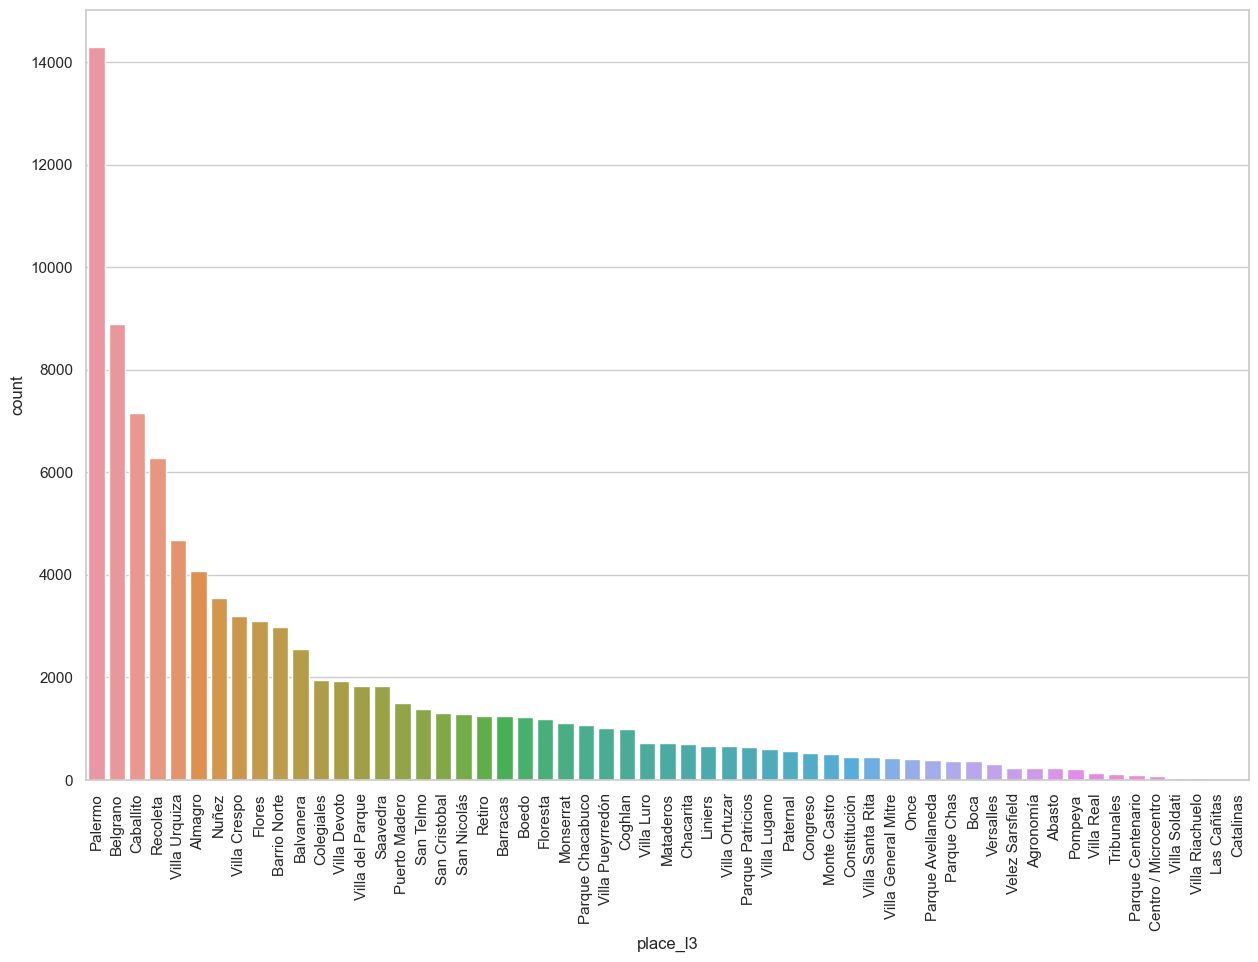

In [175]:
#graficamos barplot de place_l3
plt.figure(figsize=(15, 10))
sns.countplot(x='place_l3', data=ds_propiedades, order=ds_propiedades.place_l3.value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [176]:
ds_propiedades.property_type.value_counts()

Departamento    80829
PH               9266
Casa             4154
Name: property_type, dtype: int64

<h5>Apariciones de cada tipo de propiedad </h5>


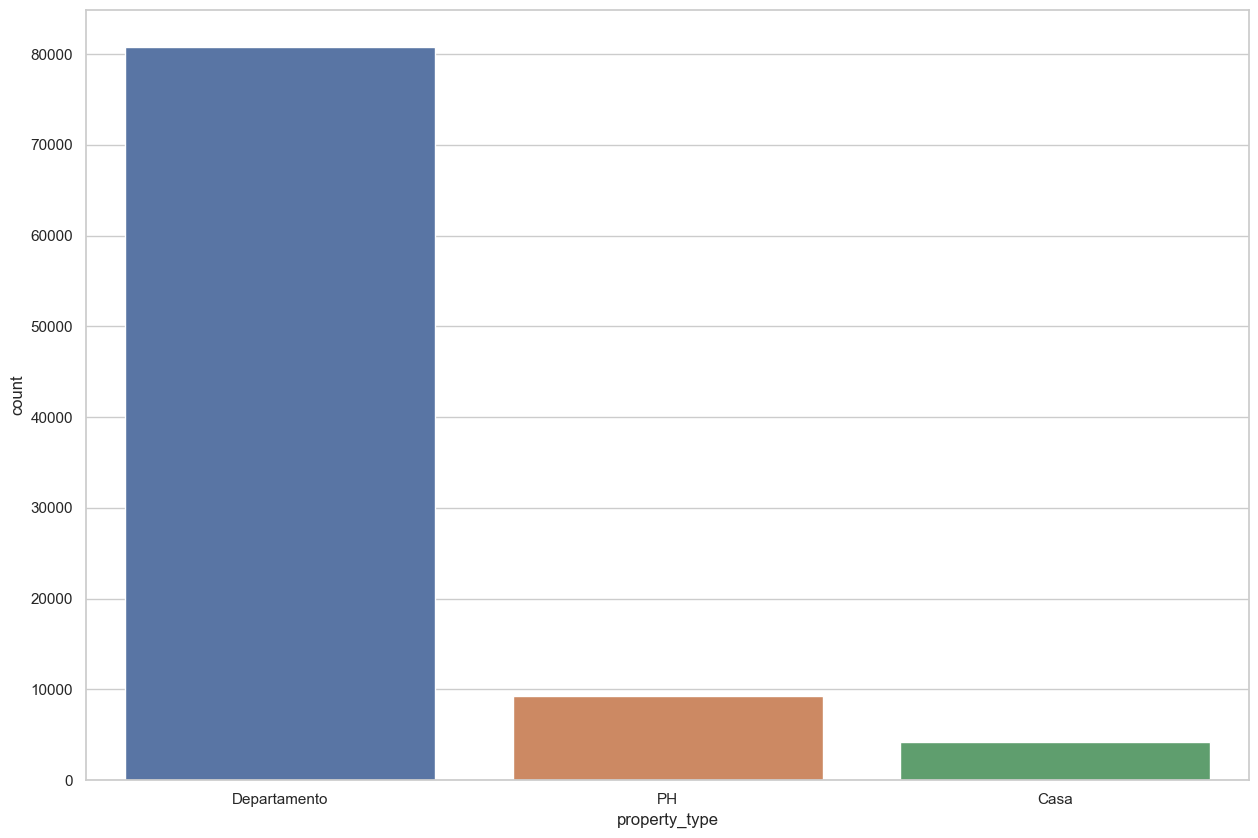

In [177]:
#graficamos barplot de property_types
plt.figure(figsize=(15, 10))
sns.countplot(x='property_type', data=ds_propiedades, order=ds_propiedades.property_type.value_counts().index)

plt.show()

Siguiendo con el análisis gráfico de las distribuciones de las variables, hacemos un pairplot:


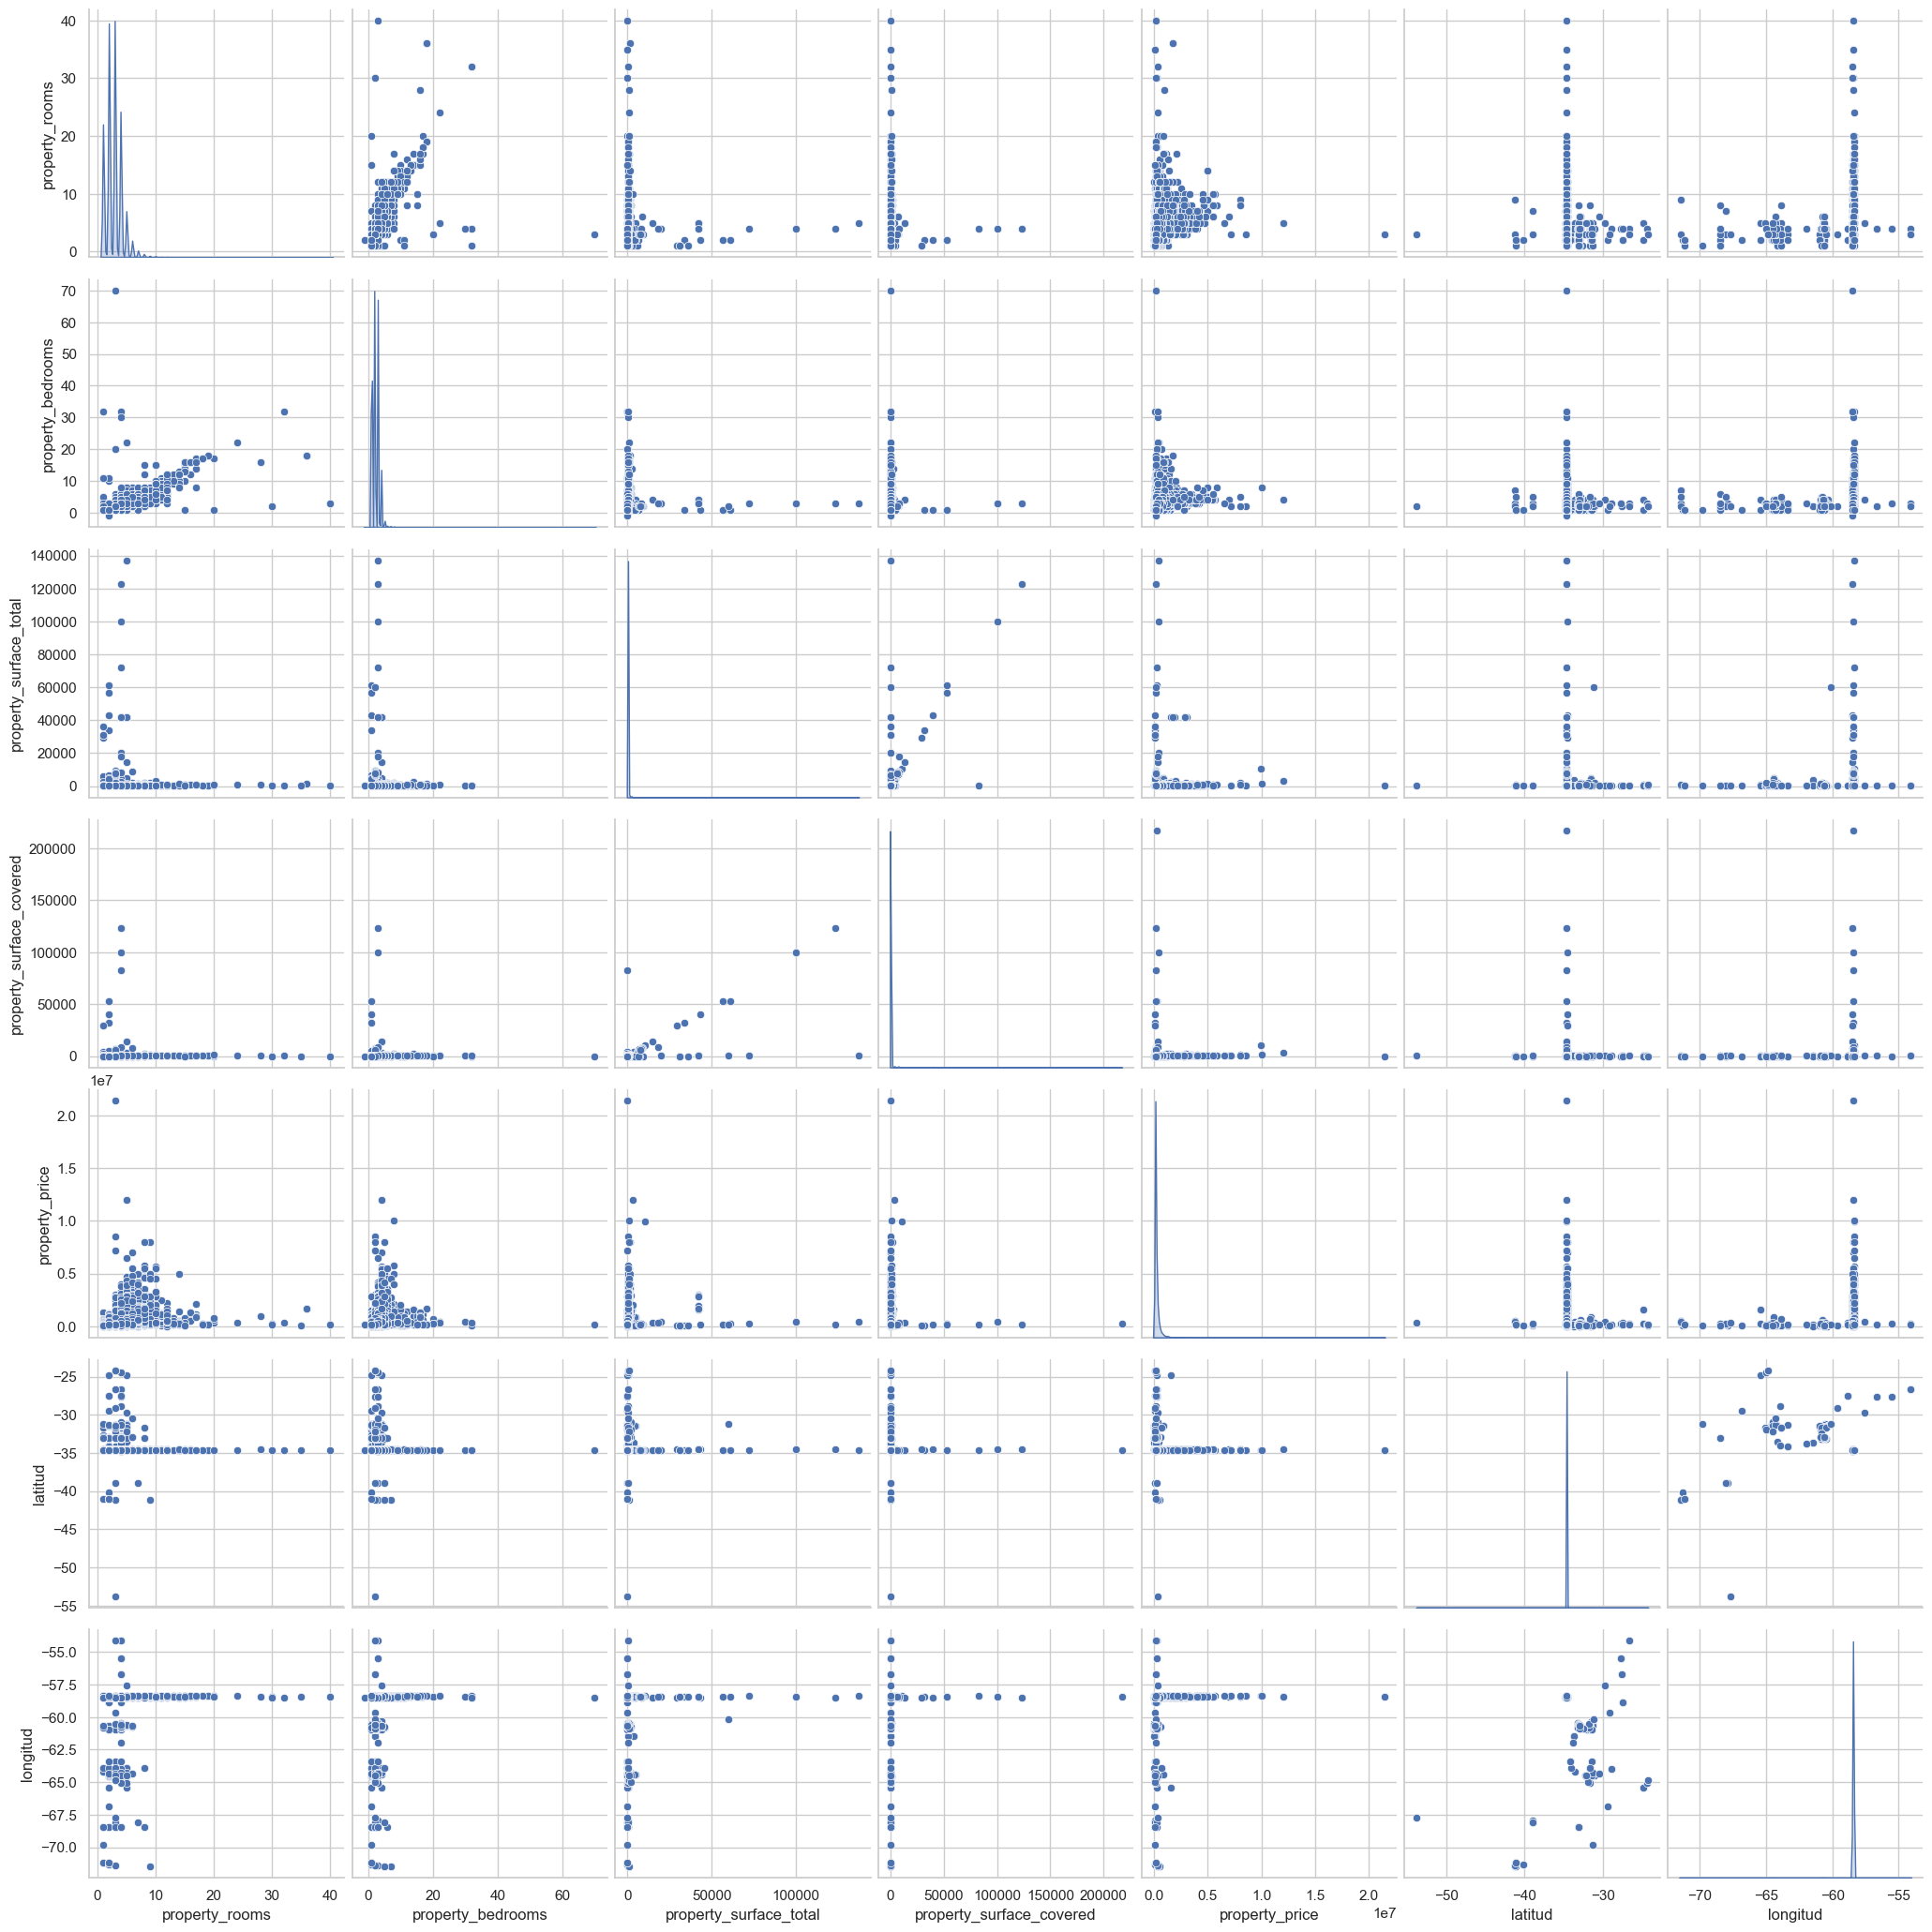

In [178]:
sns.pairplot(ds_propiedades[variables_cuantitativas], diag_kind='kde', height=3)
plt.show()

<h4>Análisis de las correlaciones</h4>

In [179]:
ds_propiedades[variables_cuantitativas].corr()

,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,latitud,longitud
property_rooms,1.000000,0.871940,0.067211,0.076097,0.488934,0.005521,-0.008324
property_bedrooms,0.871940,1.000000,0.067702,0.075075,0.425386,0.003162,-0.008556
property_surface_total,0.067211,0.067702,1.000000,0.604311,0.085235,0.025348,-0.015056
property_surface_covered,0.076097,0.075075,0.604311,1.000000,0.056238,0.002352,-0.001155
property_price,0.488934,0.425386,0.085235,0.056238,1.000000,0.016635,0.023314
latitud,0.005521,0.003162,0.025348,0.002352,0.016635,1.000000,-0.239235
longitud,-0.008324,-0.008556,-0.015056,-0.001155,0.023314,-0.239235,1.000000


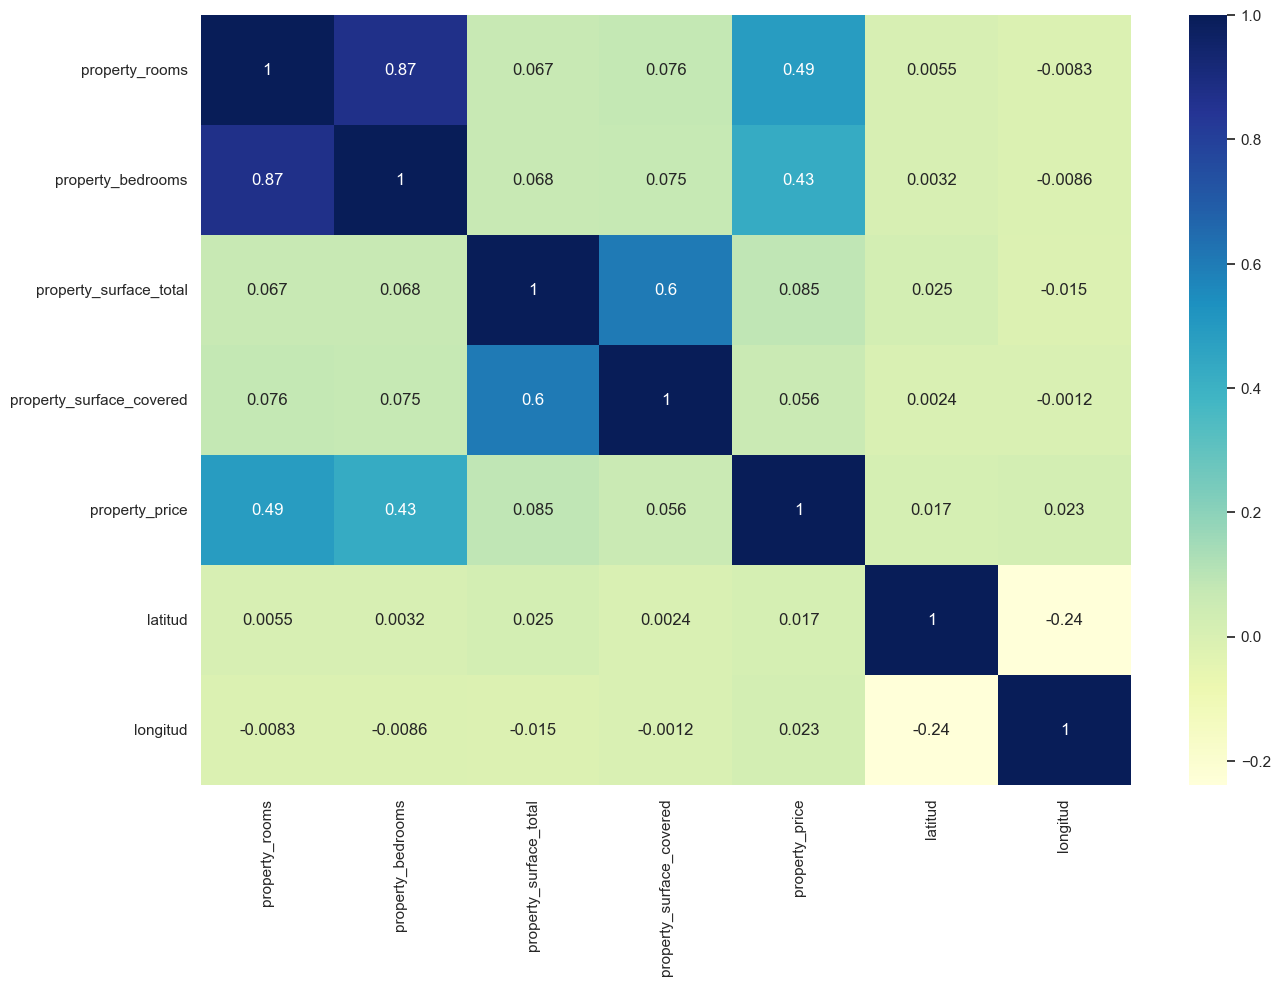

In [180]:
plt.figure(figsize=(15, 10))
sns.heatmap(ds_propiedades[variables_cuantitativas].corr(),annot=True,cmap="YlGnBu")
plt.show()

In [181]:
#Hacemos una variable a modo de checkpoint del dataset total para no requerir correr todo el codigo de nuevo

ds_propiedades_analisis_exploratorio = ds_propiedades.copy()

<h2>Separación entre Train y Test (80%/20%)</h2>

Hacemos un split del dataset en train y test, con un 80% de los datos para train y 20% para test. Luego hacemos un análisis de las distribuciones de las variables en train y test para verificar que se comporten similar y no haya habido una separacion al azar infortuna.

In [182]:
#levantamos el dataset de propiedades ya analizado
ds_propiedades = ds_propiedades_analisis_exploratorio.copy()

In [183]:
from sklearn.model_selection import train_test_split

ds_propiedades_train, ds_propiedades_test = train_test_split(ds_propiedades, test_size = 0.20, random_state=1)

<h2>Hacemos el analisis de los dos datasets</h2>

<h4>Variables cuantitativas</h4>

Comenzamos con el analisis de las variables cuantitativas en TRAIN, calculando las medidas de resumen para cada una de ellas.

In [184]:
variables_cuantitativas = ["property_rooms", "property_bedrooms", "property_surface_total", "property_surface_covered", "property_price", "latitud", "longitud"]
ds_variables_cuantitativas = ds_propiedades_train[variables_cuantitativas]
ds_variables_cuantitativas_resumen_train = ds_variables_cuantitativas.describe()
ds_variables_cuantitativas_resumen_train.drop(['count', 'min', 'max', 'std'], inplace=True) #Sacamos las variables que no nos importan


#calcualamos la moda
mode = ds_propiedades_train[variables_cuantitativas].mode()
ds_variables_cuantitativas_resumen_train = ds_variables_cuantitativas_resumen_train.append(mode) #La agregamos al dataframe

ds_variables_cuantitativas_resumen_train.rename(index={'50%': 'mediana', '25%': 'q1', '75%': 'q3', 0:'moda', 'mean':'media'}, inplace=True) #renombramos labels
ds_variables_cuantitativas_resumen_train

,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,latitud,longitud
media,2.821728,2.015891,108.843508,88.217949,225956.331835,-34.591261,-58.449904
q1,2.000000,1.000000,45.000000,40.000000,95000.000000,-34.615979,-58.466524
mediana,3.000000,2.000000,65.000000,58.000000,143900.000000,-34.595790,-58.439153
q3,4.000000,3.000000,104.000000,88.000000,235000.000000,-34.577378,-58.409025
moda,3.000000,1.000000,50.000000,40.000000,110000.000000,-34.541250,-58.472966


Repetimos para el dataset de TEST

In [185]:
ds_variables_cuantitativas = ds_propiedades_test[variables_cuantitativas]
ds_variables_cuantitativas_resumen_test = ds_variables_cuantitativas.describe()
ds_variables_cuantitativas_resumen_test.drop(['count', 'min', 'max', 'std'], inplace=True) #Sacamos las variables que no nos importan


#calcualamos la moda
mode = ds_propiedades_test[variables_cuantitativas].mode()
ds_variables_cuantitativas_resumen_test = ds_variables_cuantitativas_resumen_test.append(mode) #La agregamos al dataframe

ds_variables_cuantitativas_resumen_test.rename(index={'50%': 'mediana', '25%': 'q1', '75%': 'q3', 0:'moda', 'mean':'media'}, inplace=True) #renombramos labels
ds_variables_cuantitativas_resumen_test

,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,latitud,longitud
media,2.827077,2.009613,110.090401,86.78873,227365.693634,-34.592360,-58.449356
q1,2.000000,1.000000,45.000000,40.00000,95000.000000,-34.615879,-58.466431
mediana,3.000000,2.000000,65.000000,58.00000,143180.500000,-34.595771,-58.438291
q3,4.000000,3.000000,106.000000,89.00000,239000.000000,-34.577595,-58.408352
moda,2.000000,1.000000,50.000000,40.00000,110000.000000,-34.619406,-58.451999


Comparacion grafica de todas las variables cuantitativas en el dataset completo, train y test. Hacemos un boxplot observar que las distribuciones de las variables son similares en train y test.
Este grafico nos ayudara luego para ver las diferencias entre train y test en el desarrollo del trabajo.

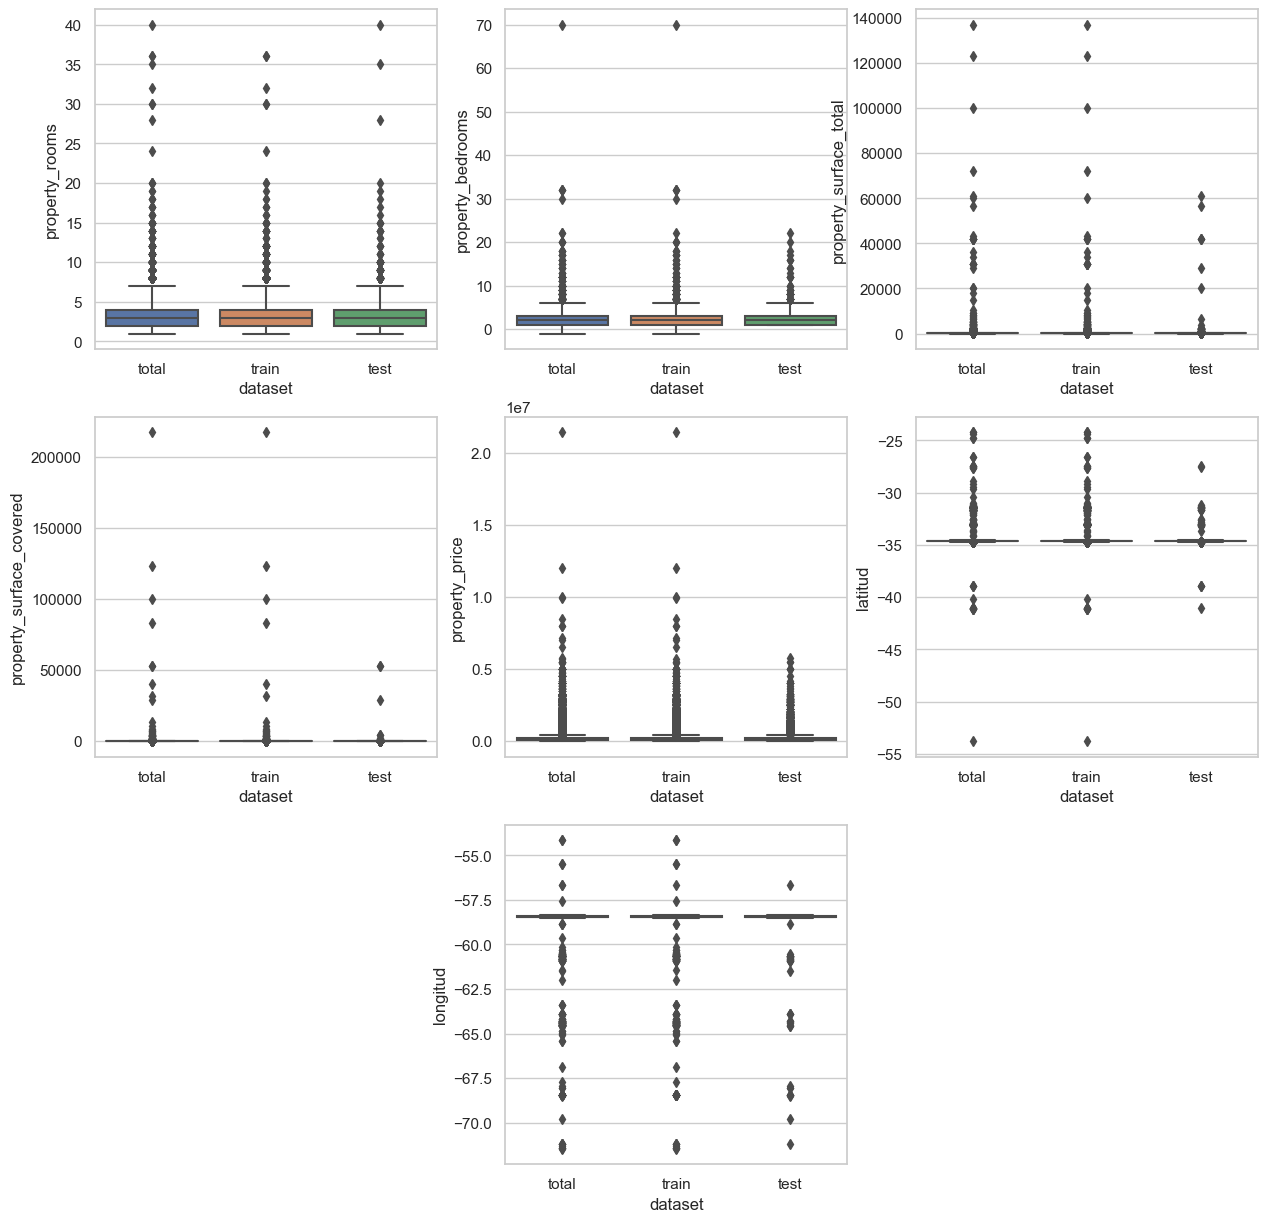

<Figure size 1500x1000 with 0 Axes>

In [186]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

datos_cuantitativos = ds_propiedades.copy()[['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'latitud', 'longitud']]
datos_cuantitativos_train = ds_propiedades_train.copy()[['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'latitud', 'longitud']]
datos_cuantitativos_test = ds_propiedades_test.copy()[['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'latitud', 'longitud']]

datos_cuantitativos['dataset'] = 'total'
datos_cuantitativos_train['dataset'] = 'train'
datos_cuantitativos_test['dataset'] = 'test'

datos_cuantitativos = pd.concat([datos_cuantitativos, datos_cuantitativos_train, datos_cuantitativos_test])

plt.figure(figsize=(15, 10))
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_rooms', ax=axs[0, 0])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_bedrooms', ax=axs[0, 1])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_surface_total', ax=axs[0, 2])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_surface_covered', ax=axs[1, 0])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_price', ax=axs[1, 1])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='latitud', ax=axs[1, 2])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='longitud', ax=axs[2, 1])

plt.delaxes(axs[2, 0])
plt.delaxes(axs[2, 2])

# plt.boxplot(x=ds_propiedades_train['property_rooms'])

plt.show()

<h4>Variables cualitativas</h4>

Comenzamos por property_type

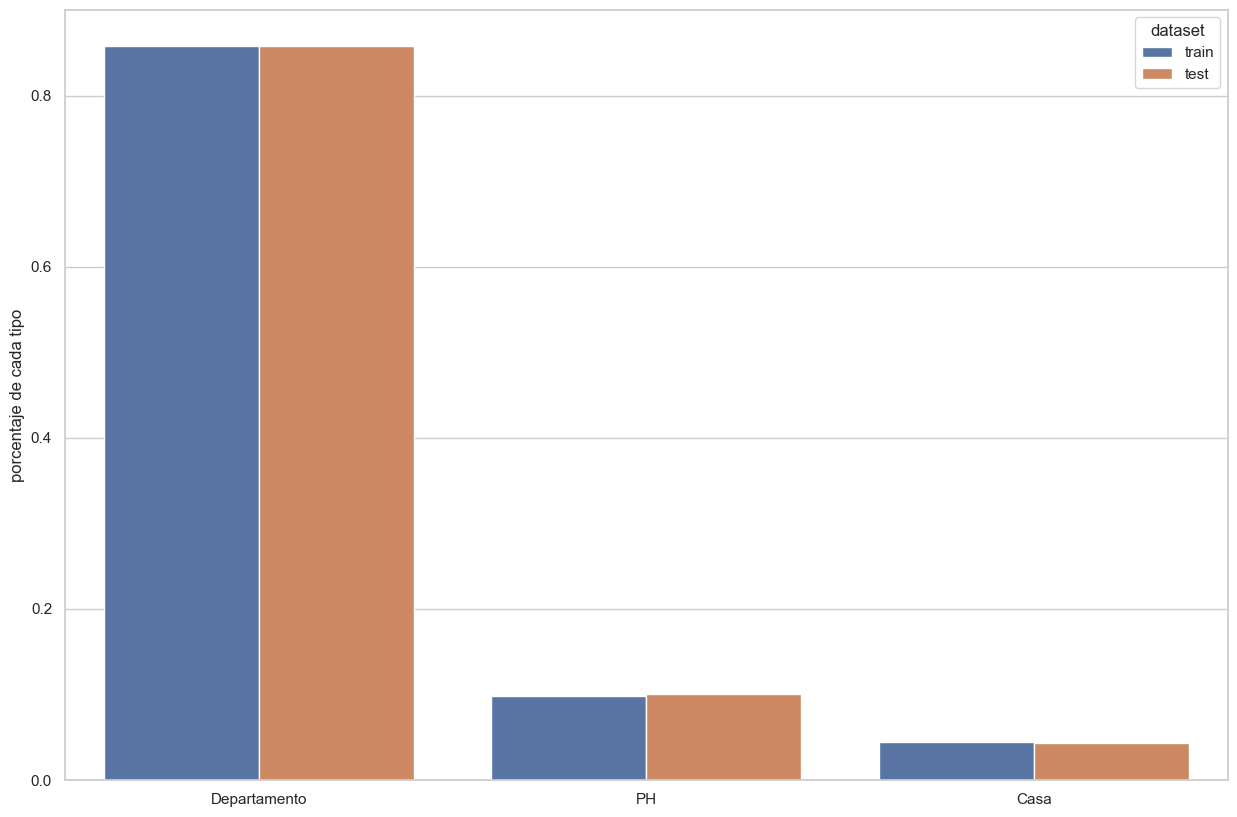

In [187]:
# fig, axs = plt.subplots(1, 2, figsize=(15, 10))

df_property_type_train = ds_propiedades_train.property_type.value_counts(normalize=True).to_frame(name="porcentaje de cada tipo")
df_property_type_test = ds_propiedades_test.property_type.value_counts(normalize=True).to_frame(name="porcentaje de cada tipo")

df_property_type_train['dataset'] = 'train'
df_property_type_test['dataset'] = 'test'

df_property_type = pd.concat([df_property_type_train, df_property_type_test])

plt.figure(figsize=(15, 10))
sns.barplot(data=df_property_type, x=df_property_type.index, y='porcentaje de cada tipo', hue='dataset')

plt.show()

Ahora repetimos para place_l3 (barrio)

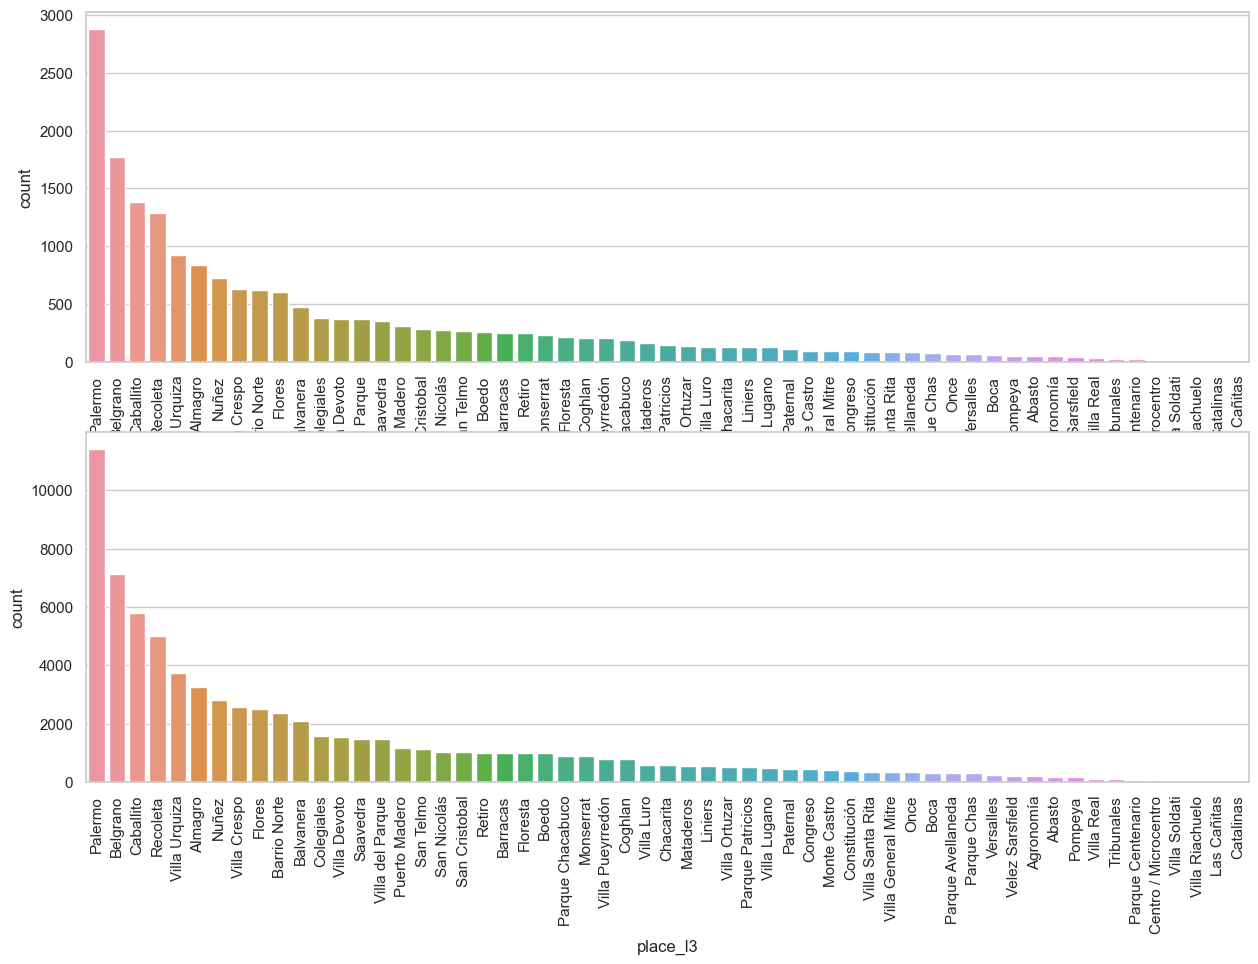

In [188]:
from matplotlib.pyplot import xlabel, ylabel


fig, axs = plt.subplots(2, 1, figsize=(15, 10))

sns.countplot(x='place_l3', data=ds_propiedades_test, order=ds_propiedades_test.place_l3.value_counts().index, ax=axs[0])
sns.countplot(x='place_l3', data=ds_propiedades_train, order=ds_propiedades_train.place_l3.value_counts().index, ax=axs[1])

axs[0].tick_params(axis='x', rotation=90)
axs[1].tick_params(axis='x', rotation=90)

plt.show()

<h4>Analisis de las correlaciones</h4>

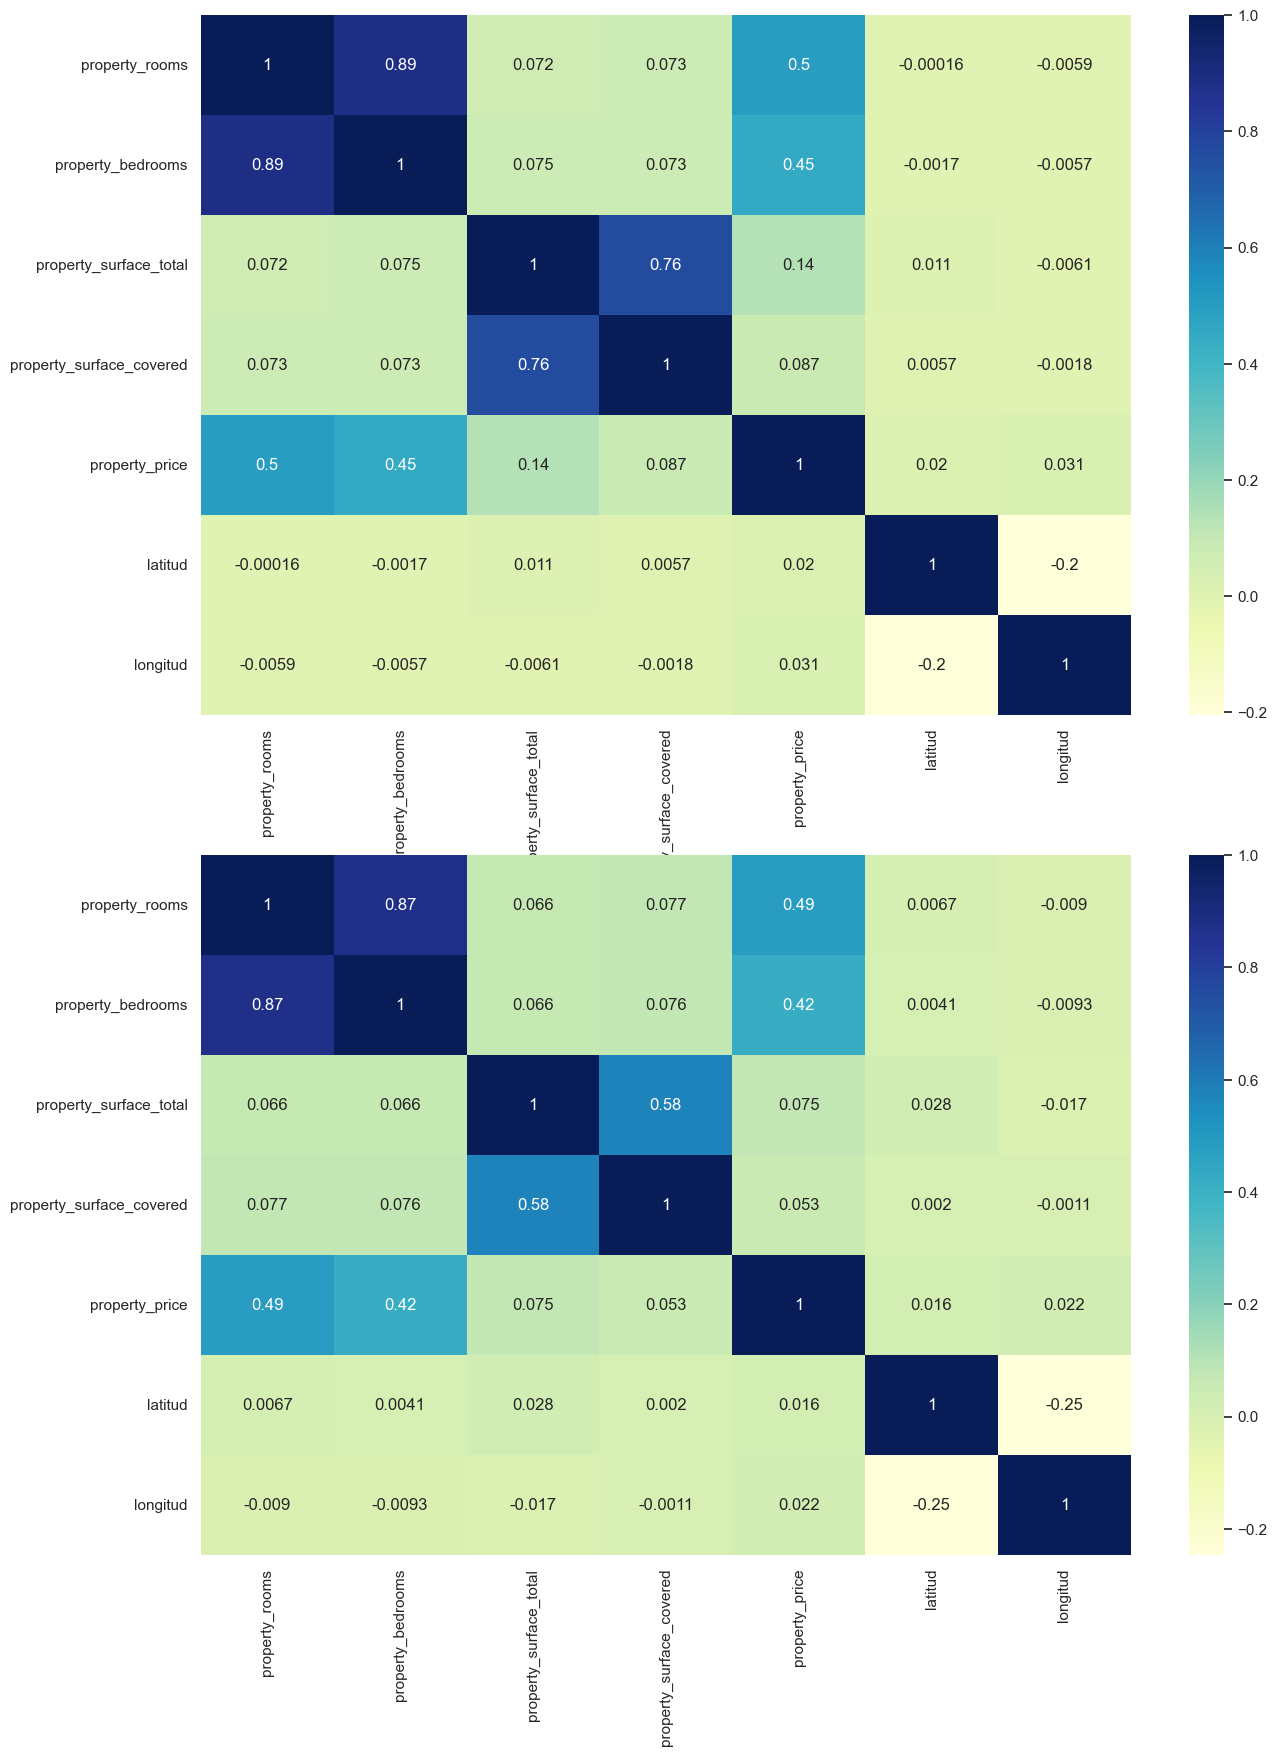

In [189]:
fig, axs = plt.subplots(2, 1, figsize=(15, 20))

sns.heatmap(ds_propiedades_test[variables_cuantitativas].corr(),annot=True,cmap="YlGnBu", ax=axs[0])
sns.heatmap(ds_propiedades_train[variables_cuantitativas].corr(),annot=True,cmap="YlGnBu", ax=axs[1])

plt.show()


Luego del analisis de ambos datasets, podemos ver que las correlaciones son muy similares, por lo que no hay que preocuparse por el split realizado.

In [190]:
# checkpoint de los datasets previamente analizados
ds_propiedades_test_analizado = ds_propiedades_test.copy()
ds_propiedades_train_analizado = ds_propiedades_train.copy()


<h2>Conclusiones sobre los datos </h2>
Correlaciones: Podemos ver que las que más estan relacionadas son:
    <br>* La cantidad de habitaciones con la cantidad de dormitorios, esto nos parece bien porque las viviendas más grandes, suelen tener más dormitorios
    <br>* La superficie total con la superficie cubierta, lo que tiene sentido ya que la superficie total incluye a la superficie cubierta. 
    <br>* La cantidad de habitaciones y el precio, esto no nos sorprende debido a que normalmente a mayor cantidad de habitaciones, más grande es la vivienda y más cara se vuelve (lo mismo con la cantidad de dormitorios y el precio)

Por otro lado, nos sorprende que no haya correlacion entre la superficie y el precio. Esto puede deberse a que hay viviendas grandes que son baratas al no estar en un barrio muy cotizado y otras pequeñas que son muy caras. <br>

En la distribución de tipo de vivienda notamos gran cantidad de departamentos frente a la cantidad de casa y PHs. Esto puede deberse a que la mayoría de las viviendas en Capital Federal son departamentos. <br>  <br>
En la distribución de localidades, notamos una gran disparidad entre estas. Los lugares con mayor cantidad de viviendas en venta son Palermo, Belgrano, Caballito y Recoleta. Esto puede deberse a que son las zonas mas céntricas de la ciudad. <br>  <br>
Notamos que la media de la logitud y la longitud, no es el centro geografico de la ciudad (Caballito) si no que esta más cerca de Palermo, esto se debe a que la mayoría de los anuncios de venta publicados son de viviendas en este barrio. <br>  <br>


Notamos que las variables "place_l6", "place_l5" y "place_l4" tienen todos sus valores nulos, por lo que no aportan información. <br>



<b> <strong> <h2>Búsqueda de Outliers </h2>

In [191]:
ds_propiedades_test = ds_propiedades_test_analizado.copy()
ds_propiedades_train = ds_propiedades_train_analizado.copy()

Para hacer el análisis univariado de las variables cuantitativas hacemos gráficos estas para ver su distribución de sus datos

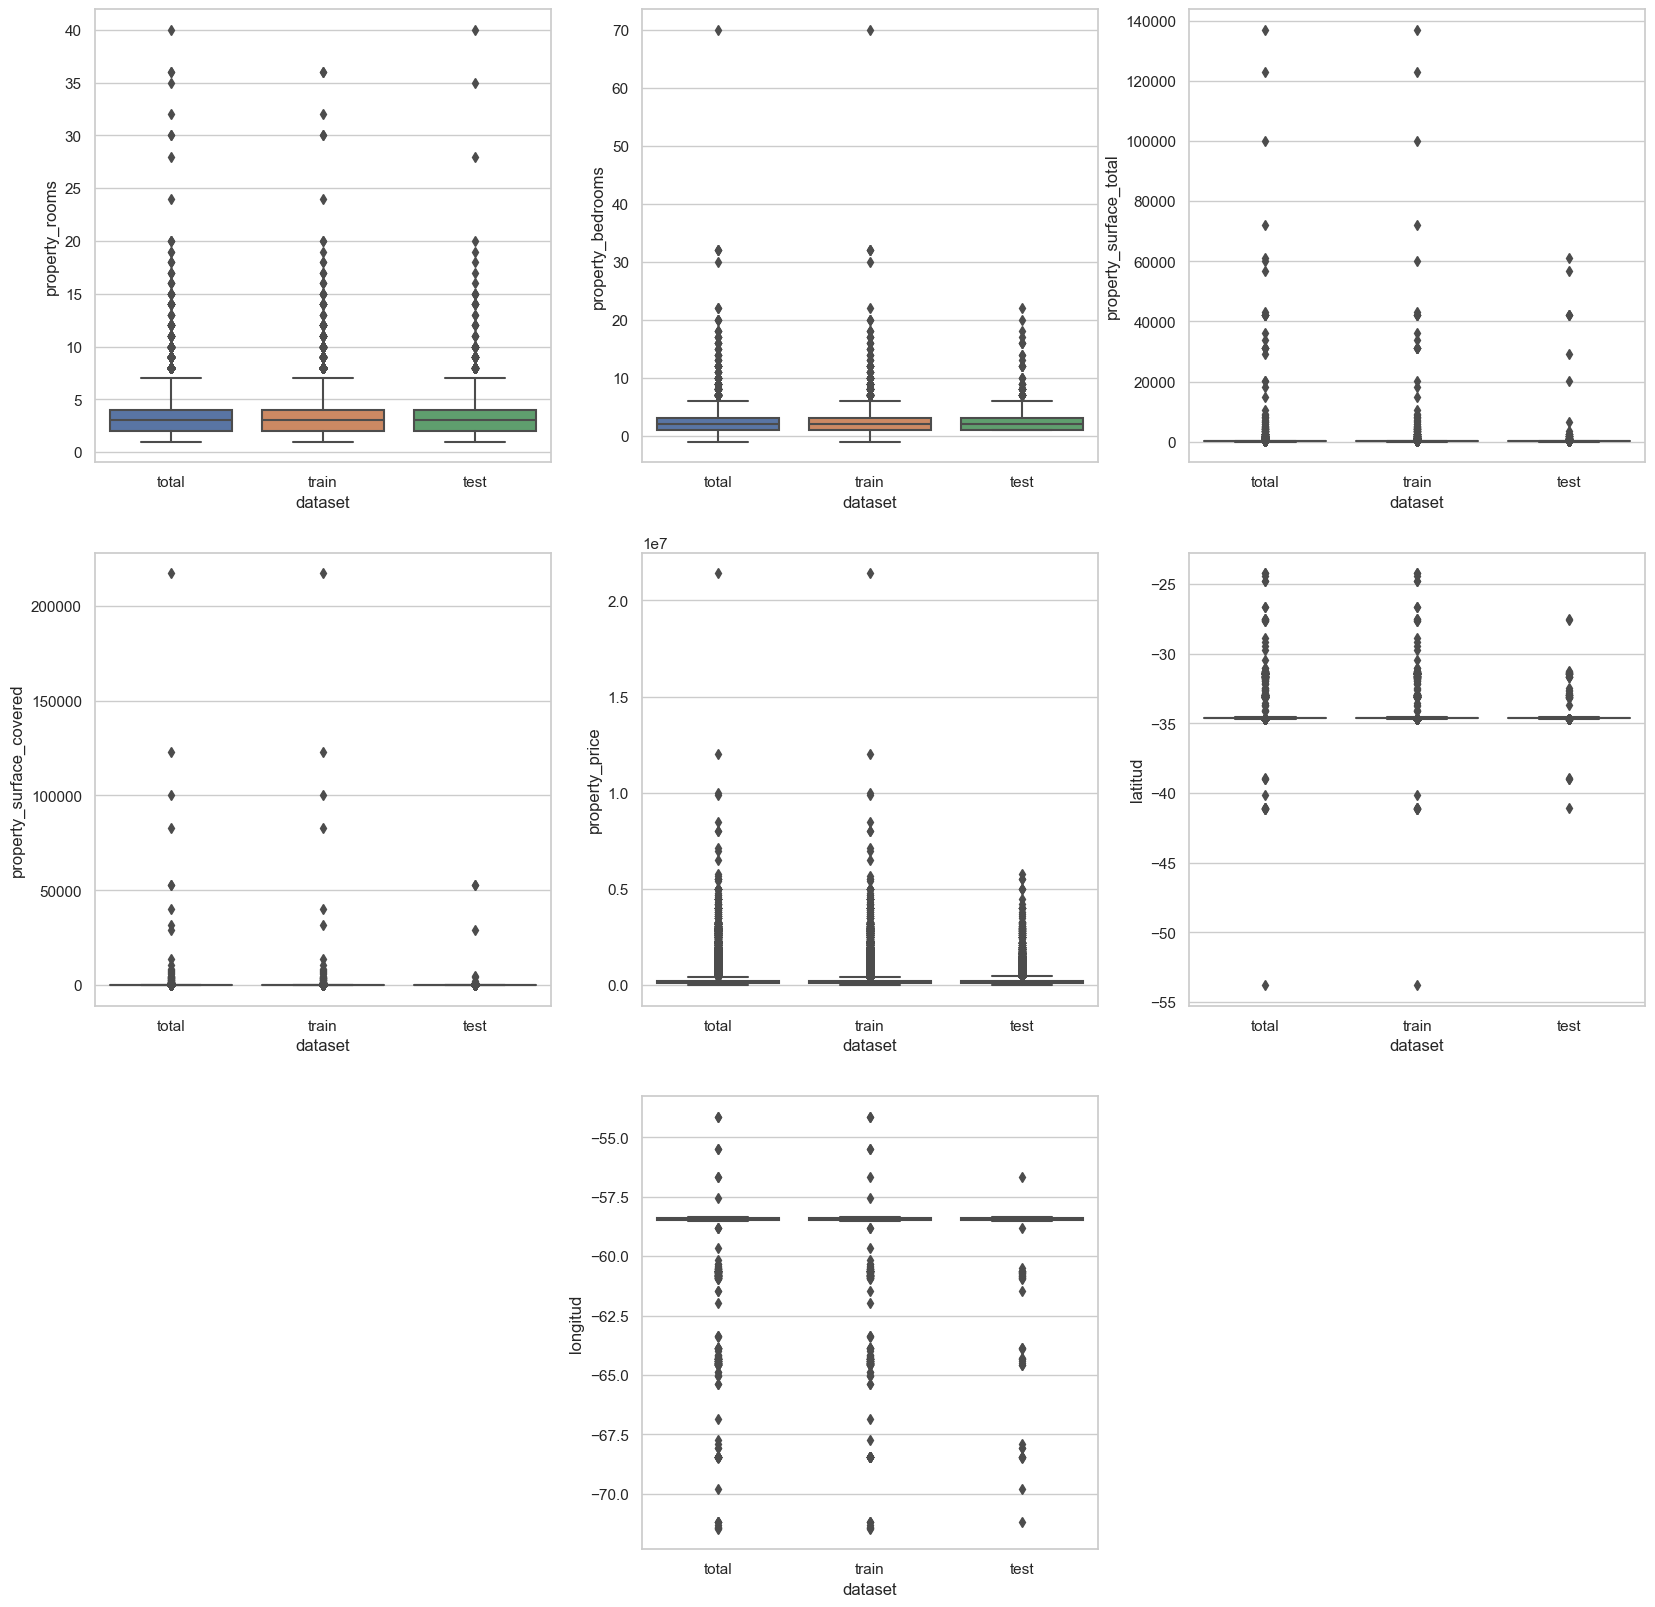

<Figure size 1500x1000 with 0 Axes>

In [192]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

datos_cuantitativos = ds_propiedades.copy()[['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'latitud', 'longitud']]
datos_cuantitativos_train = ds_propiedades_train.copy()[['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'latitud', 'longitud']]
datos_cuantitativos_test = ds_propiedades_test.copy()[['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'latitud', 'longitud']]

datos_cuantitativos['dataset'] = 'total'
datos_cuantitativos_train['dataset'] = 'train'
datos_cuantitativos_test['dataset'] = 'test'

datos_cuantitativos = pd.concat([datos_cuantitativos, datos_cuantitativos_train, datos_cuantitativos_test])

plt.figure(figsize=(15, 10))
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_rooms', ax=axs[0, 0])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_bedrooms', ax=axs[0, 1])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_surface_total', ax=axs[0, 2])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_surface_covered', ax=axs[1, 0])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_price', ax=axs[1, 1])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='latitud', ax=axs[1, 2])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='longitud', ax=axs[2, 1])

plt.delaxes(axs[2, 0])
plt.delaxes(axs[2, 2])

# plt.boxplot(x=ds_propiedades_train['property_rooms'])

plt.show()

Podemos ver en los boxplot superiores que todas las viariables cuantitativas tienen más de un poisble outlier. Para poder detectar con mayor precisión cuales pueden ser estos, procederemos a calcular los z-score de estos

In [193]:
# ds_propiedades_train.reset_index(drop=True, inplace=True)
# ds_propiedades_test.reset_index(drop=True, inplace=True)
ds_propiedades_test_zscore = ds_propiedades_test.copy()
ds_propiedades_train_zscore = ds_propiedades_train.copy()


In [194]:
#analisis de Zscore en el dataset de train
for columna in variables_cuantitativas:
    columna_actual = ds_propiedades_train_zscore[columna]
    media=np.mean(columna_actual)
    std=np.std(columna_actual)
    ds_propiedades_train_zscore[f'z_{columna}'] = np.abs((columna_actual - media)/std)

ds_propiedades_train_zscore

,latitud,longitud,place_l3,place_l4,place_l5,place_l6,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,z_property_rooms,z_property_bedrooms,z_property_surface_total,z_property_surface_covered,z_property_price,z_latitud,z_longitud
60535,-34.558855,-58.452458,Nuñez,NaN,NaN,NaN,Departamento,4.0,3.0,160.0,146.0,460000.0,0.831636,0.865657,0.050903,0.054169,0.727165,0.171620,0.008716
74300,-34.582403,-58.443841,Colegiales,NaN,NaN,NaN,Departamento,2.0,1.0,50.0,46.0,148000.0,0.579983,0.893614,0.058551,0.039578,0.242207,0.046912,0.020694
20393,-34.567858,-58.446164,Belgrano,NaN,NaN,NaN,Departamento,9.0,3.0,390.0,390.0,1250000.0,4.360686,0.865657,0.279761,0.282915,3.181665,0.123944,0.012765
20578,NaN,NaN,Almagro,NaN,NaN,NaN,Departamento,3.0,2.0,47.0,47.0,89000.0,0.125826,0.013979,0.061536,0.038641,0.425518,NaN,NaN
38282,-34.686350,-58.477110,Villa Lugano,NaN,NaN,NaN,PH,3.0,2.0,104.0,54.0,120000.0,0.125826,0.013979,0.004819,0.032079,0.329202,0.503583,0.092850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,-34.619406,-58.451999,Caballito,NaN,NaN,NaN,Departamento,2.0,1.0,42.0,38.0,96000.0,0.579983,0.893614,0.066512,0.047078,0.403769,0.149052,0.007151
73349,-34.581411,-58.408848,Palermo,Palermo Chico,NaN,NaN,Departamento,3.0,2.0,71.0,65.0,329000.0,0.125826,0.013979,0.037656,0.021766,0.320153,0.052167,0.140119
50057,-34.580851,-58.413747,Palermo,NaN,NaN,NaN,Departamento,3.0,2.0,78.0,73.0,219900.0,0.125826,0.013979,0.030690,0.014267,0.018817,0.055134,0.123400
5192,-34.584074,-58.422690,Palermo,NaN,NaN,NaN,Departamento,4.0,3.0,55.0,55.0,170000.0,0.831636,0.865657,0.053576,0.031141,0.173854,0.038061,0.092878


Sabemos que los que tienen un Z-Score mayor a 3 son Outliers

Ahora hacemos lo mismo con los datos de train

In [195]:
#analisis de Zscore en el dataset de test
for columna in variables_cuantitativas:
    columna_actual = ds_propiedades_test_zscore[columna]
    media=np.mean(columna_actual)
    std=np.std(columna_actual)
    ds_propiedades_test_zscore[f'z_{columna}'] = np.abs((columna_actual - media)/std)

ds_propiedades_test_zscore

,latitud,longitud,place_l3,place_l4,place_l5,place_l6,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,z_property_rooms,z_property_bedrooms,z_property_surface_total,z_property_surface_covered,z_property_price,z_latitud,z_longitud
47135,-34.554682,-58.478302,Saavedra,NaN,NaN,NaN,Departamento,3.0,2.0,127.0,78.0,219000.0,0.118216,0.008730,0.019321,0.014673,0.027408,0.251297,0.099434
22864,-34.610723,-58.394176,Congreso,NaN,NaN,NaN,Departamento,3.0,2.0,NaN,62.0,97500.0,0.118216,0.008730,NaN,0.041384,0.425471,0.122468,0.189552
76296,-34.610046,-58.361382,Puerto Madero,NaN,NaN,NaN,Departamento,3.0,2.0,171.0,171.0,1000000.0,0.118216,0.008730,0.069596,0.140589,2.531334,0.117953,0.302205
54604,-34.629075,-58.367129,Boca,NaN,NaN,NaN,Departamento,2.0,1.0,41.0,38.0,60000.0,0.565417,0.916827,0.078944,0.081452,0.548330,0.244869,0.282464
89065,-34.575360,-58.441559,Colegiales,NaN,NaN,NaN,Departamento,2.0,1.0,47.0,42.0,115150.0,0.565417,0.916827,0.072088,0.074774,0.367645,0.113385,0.026784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28310,-34.613398,-58.359734,Puerto Madero,NaN,NaN,NaN,Departamento,4.0,3.0,177.0,160.0,1090000.0,0.801850,0.899368,0.076452,0.122224,2.826195,0.140309,0.307868
54642,-34.604427,-58.418079,Almagro,NaN,NaN,NaN,Departamento,1.0,NaN,32.0,30.0,68500.0,1.249051,NaN,0.089227,0.094807,0.520482,0.080475,0.107441
51333,-34.638328,-58.473294,Floresta,NaN,NaN,NaN,Departamento,1.0,NaN,41.0,27.0,58900.0,1.249051,NaN,0.078944,0.099816,0.551934,0.306581,0.082231
86137,-34.592111,-58.432919,Palermo,NaN,NaN,NaN,Departamento,1.0,1.0,40.0,37.0,81000.0,1.249051,0.916827,0.080086,0.083121,0.479529,0.001664,0.056463


Borramos a todos las observaciones cuyo Z-Score es mayor a 3 <br>

In [196]:
ds_propiedades_train_zscore.drop(ds_propiedades_train_zscore[ds_propiedades_train_zscore['z_property_surface_total'] > 3].index, inplace=True)
ds_propiedades_train_zscore.drop(ds_propiedades_train_zscore[ds_propiedades_train_zscore['z_property_surface_covered'] > 3].index, inplace=True)
ds_propiedades_train_zscore.drop(ds_propiedades_train_zscore[ds_propiedades_train_zscore['z_property_price'] > 3].index, inplace=True)
ds_propiedades_train_zscore.drop(ds_propiedades_train_zscore[ds_propiedades_train_zscore['z_latitud'] > 3].index, inplace=True)
ds_propiedades_train_zscore.drop(ds_propiedades_train_zscore[ds_propiedades_train_zscore['z_longitud'] > 3].index, inplace=True)
ds_propiedades_train_zscore.drop(ds_propiedades_train_zscore[ds_propiedades_train_zscore['z_property_rooms'] > 3].index, inplace=True)
ds_propiedades_train_zscore.drop(ds_propiedades_train_zscore[ds_propiedades_train_zscore['z_property_bedrooms'] > 3].index, inplace=True)

In [197]:
ds_propiedades_test_zscore.drop(ds_propiedades_test_zscore[ds_propiedades_test_zscore['z_property_surface_total'] > 3].index, inplace=True)
ds_propiedades_test_zscore.drop(ds_propiedades_test_zscore[ds_propiedades_test_zscore['z_property_surface_covered'] > 3].index, inplace=True)
ds_propiedades_test_zscore.drop(ds_propiedades_test_zscore[ds_propiedades_test_zscore['z_property_price'] > 3].index, inplace=True)
ds_propiedades_test_zscore.drop(ds_propiedades_test_zscore[ds_propiedades_test_zscore['z_latitud'] > 3].index, inplace=True)
ds_propiedades_test_zscore.drop(ds_propiedades_test_zscore[ds_propiedades_test_zscore['z_longitud'] > 3].index, inplace=True)
ds_propiedades_test_zscore.drop(ds_propiedades_test_zscore[ds_propiedades_test_zscore['z_property_rooms'] > 3].index, inplace=True)
ds_propiedades_test_zscore.drop(ds_propiedades_test_zscore[ds_propiedades_test_zscore['z_property_bedrooms'] > 3].index, inplace=True)

In [198]:
ds_propiedades_train = ds_propiedades_train[ds_propiedades_train.index.isin(ds_propiedades_train_zscore.index)]
ds_propiedades_test = ds_propiedades_test[ds_propiedades_test.index.isin(ds_propiedades_test_zscore.index)]

ds_propiedades_train_zscore.shape

(73313, 19)

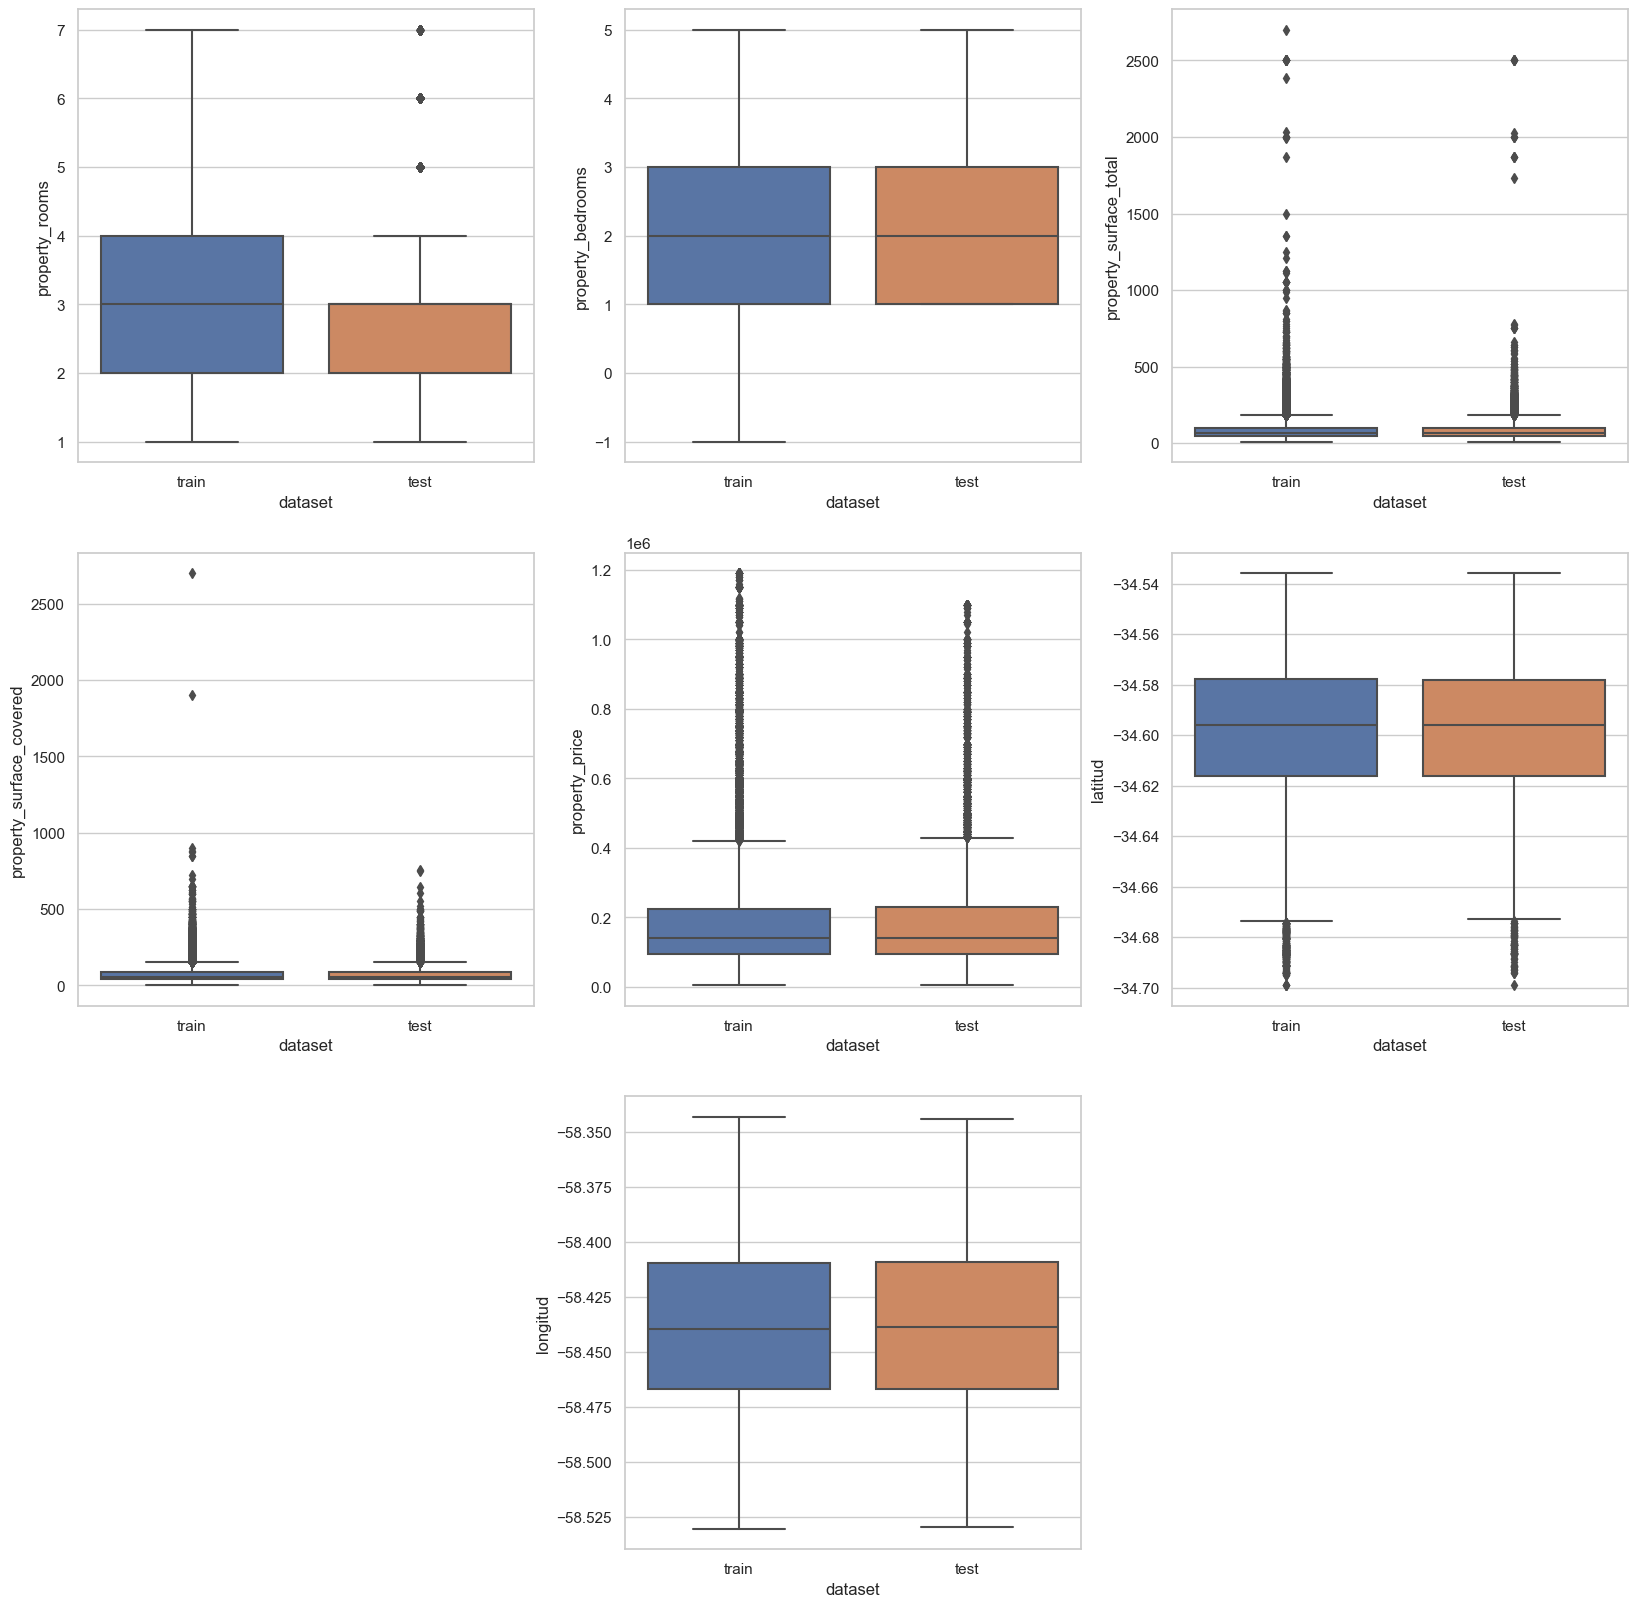

<Figure size 1500x1000 with 0 Axes>

In [199]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

datos_cuantitativos_train = ds_propiedades_train.copy()[['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'latitud', 'longitud']]
datos_cuantitativos_test = ds_propiedades_test.copy()[['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price', 'latitud', 'longitud']]

datos_cuantitativos_train['dataset'] = 'train'
datos_cuantitativos_test['dataset'] = 'test'

datos_cuantitativos = pd.concat([datos_cuantitativos_train, datos_cuantitativos_test])

plt.figure(figsize=(15, 10))
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_rooms', ax=axs[0, 0])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_bedrooms', ax=axs[0, 1])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_surface_total', ax=axs[0, 2])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_surface_covered', ax=axs[1, 0])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='property_price', ax=axs[1, 1])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='latitud', ax=axs[1, 2])
sns.boxplot(data=datos_cuantitativos, x='dataset', y='longitud', ax=axs[2, 1])

plt.delaxes(axs[2, 0])
plt.delaxes(axs[2, 2])

# plt.boxplot(x=ds_propiedades_train['property_rooms'])

plt.show()

Vemos que en el caso de las superficies cubiertas y totales, todavia quedan muchisimos outliers, por lo que volvemos a calcular los Z-Score de estas variables y realizar el filtrado

In [200]:
ds_propiedades_test_zscore = ds_propiedades_test.copy()
ds_propiedades_train_zscore = ds_propiedades_train.copy()

for columna in ['property_surface_total', 'property_surface_covered']:
    columna_actual = ds_propiedades_train_zscore[columna]
    media=np.mean(columna_actual)
    std=np.std(columna_actual)
    ds_propiedades_train_zscore[f'z_{columna}'] = np.abs((columna_actual - media)/std)

for columna in ['property_surface_total', 'property_surface_covered']:
    columna_actual = ds_propiedades_test_zscore[columna]
    media=np.mean(columna_actual)
    std=np.std(columna_actual)
    ds_propiedades_test_zscore[f'z_{columna}'] = np.abs((columna_actual - media)/std)

ds_propiedades_train_zscore.drop(ds_propiedades_train_zscore[ds_propiedades_train_zscore['z_property_surface_total'] > 3].index, inplace=True)
ds_propiedades_train_zscore.drop(ds_propiedades_train_zscore[ds_propiedades_train_zscore['z_property_surface_covered'] > 3].index, inplace=True)

ds_propiedades_test_zscore.drop(ds_propiedades_test_zscore[ds_propiedades_test_zscore['z_property_surface_total'] > 3].index, inplace=True)
ds_propiedades_test_zscore.drop(ds_propiedades_test_zscore[ds_propiedades_test_zscore['z_property_surface_covered'] > 3].index, inplace=True)

ds_propiedades_train = ds_propiedades_train[ds_propiedades_train.index.isin(ds_propiedades_train_zscore.index)]
ds_propiedades_test = ds_propiedades_test[ds_propiedades_test.index.isin(ds_propiedades_test_zscore.index)]


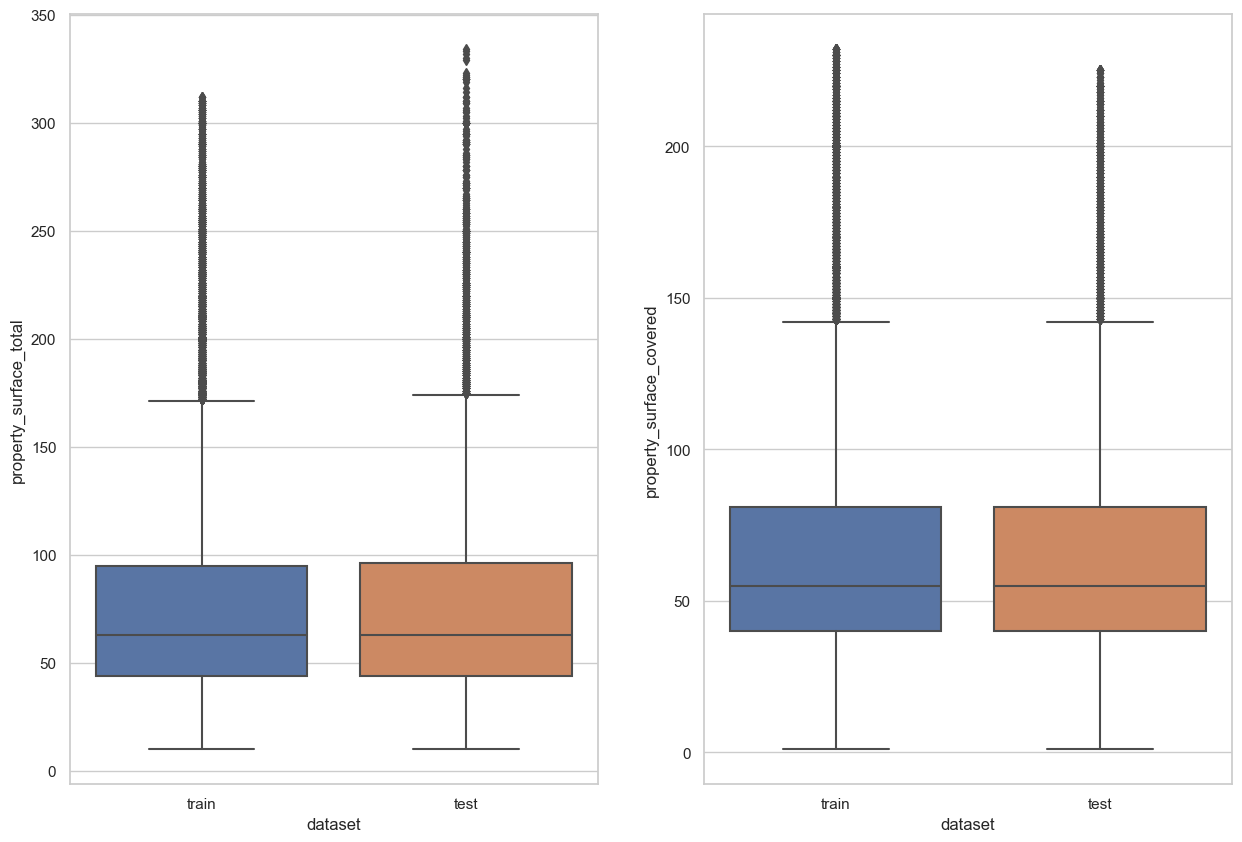

<Figure size 1500x1000 with 0 Axes>

In [201]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

superficies_train = ds_propiedades_train.copy()[[ 'property_surface_total', 'property_surface_covered']]
superficies_test = ds_propiedades_test.copy()[[ 'property_surface_total', 'property_surface_covered']]

superficies_train['dataset'] = 'train'
superficies_test['dataset'] = 'test'

superficies = pd.concat([superficies_train, superficies_test])

plt.figure(figsize=(15, 10))
sns.boxplot(data=superficies, x='dataset', y='property_surface_total', ax=axs[0])
sns.boxplot(data=superficies, x='dataset', y='property_surface_covered', ax=axs[1])

plt.show()

A traves del grafico notamos que existe una propiedad con un valor de bedrooms -1 en el train, al revisar el caso, notamos que perfectamente puede ser un error de tipeo en base a los datos y que el valor correcto sea 1

In [202]:
ds_propiedades_train[ds_propiedades_train['property_bedrooms'] < 0]


,latitud,longitud,place_l3,place_l4,place_l5,place_l6,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
82905,-34.577595,-58.495185,Villa Urquiza,NaN,NaN,NaN,Departamento,2.0,-1.0,61.0,43.0,125000.0


In [203]:
ds_propiedades_train.at[82905, 'property_bedrooms'] = 1

Ahora verificamos casos donde la cantidad de bedrooms sea mayor a la de rooms (lo cual sabemos que no es posible ya que los dormitorios son parte de los ambientes).
Comenzando por hacer un scatterplot entre estas dos variables para analizar mejor.

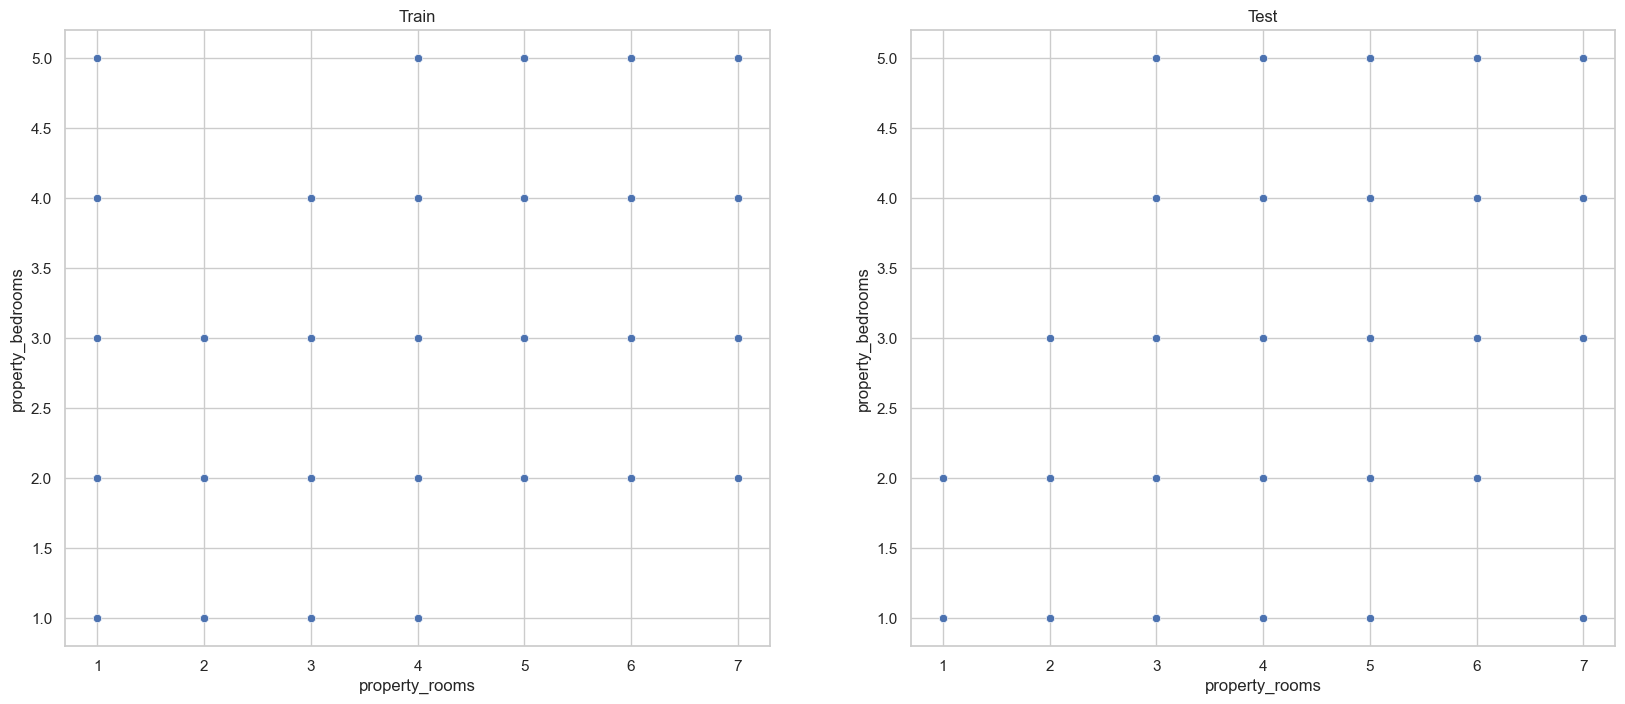

In [204]:
#scatterplot property_rooms vs property_bedrooms for train and test
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(data=ds_propiedades_train, x='property_rooms', y='property_bedrooms', ax=axs[0])
sns.scatterplot(data=ds_propiedades_test, x='property_rooms', y='property_bedrooms', ax=axs[1])

#titles
axs[0].set_title('Train')
axs[1].set_title('Test')


plt.show()


In [205]:
bedrooms_rooms_erroneas_train = (ds_propiedades_train[ds_propiedades_train['property_bedrooms'] > ds_propiedades_train['property_rooms']])
bedrooms_rooms_erroneas_test = (ds_propiedades_test[ds_propiedades_test['property_bedrooms'] > ds_propiedades_test['property_rooms']])

print(bedrooms_rooms_erroneas_train.shape)
print(bedrooms_rooms_erroneas_test.shape)

(71, 12)
(10, 12)


Como son cantidades poco significativas, las eliminamos

In [206]:
ds_propiedades_train.drop(bedrooms_rooms_erroneas_train.index, inplace=True)
ds_propiedades_test.drop(bedrooms_rooms_erroneas_test.index, inplace=True)

Al volver a graficar, notamos que ahora el grafico tine sentido y no hay viviendas con mas dormitorios que habitaciones

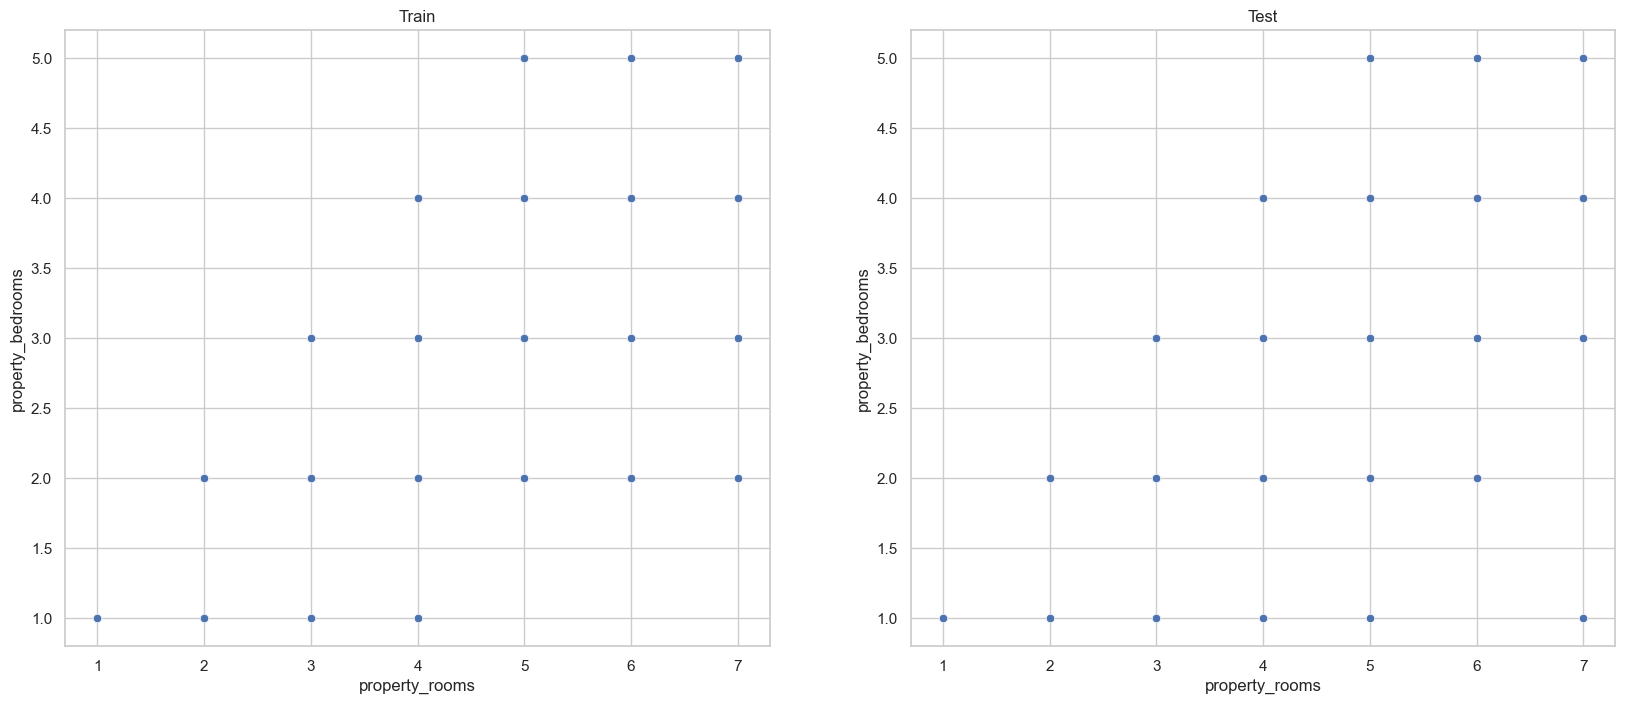

In [207]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(data=ds_propiedades_train, x='property_rooms', y='property_bedrooms', ax=axs[0])
sns.scatterplot(data=ds_propiedades_test, x='property_rooms', y='property_bedrooms', ax=axs[1])

#titles
axs[0].set_title('Train')
axs[1].set_title('Test')


plt.show()

Analizamos tambien el caso donde la superfice cubierta sea mayor a la total, lo cual no puede suceder.

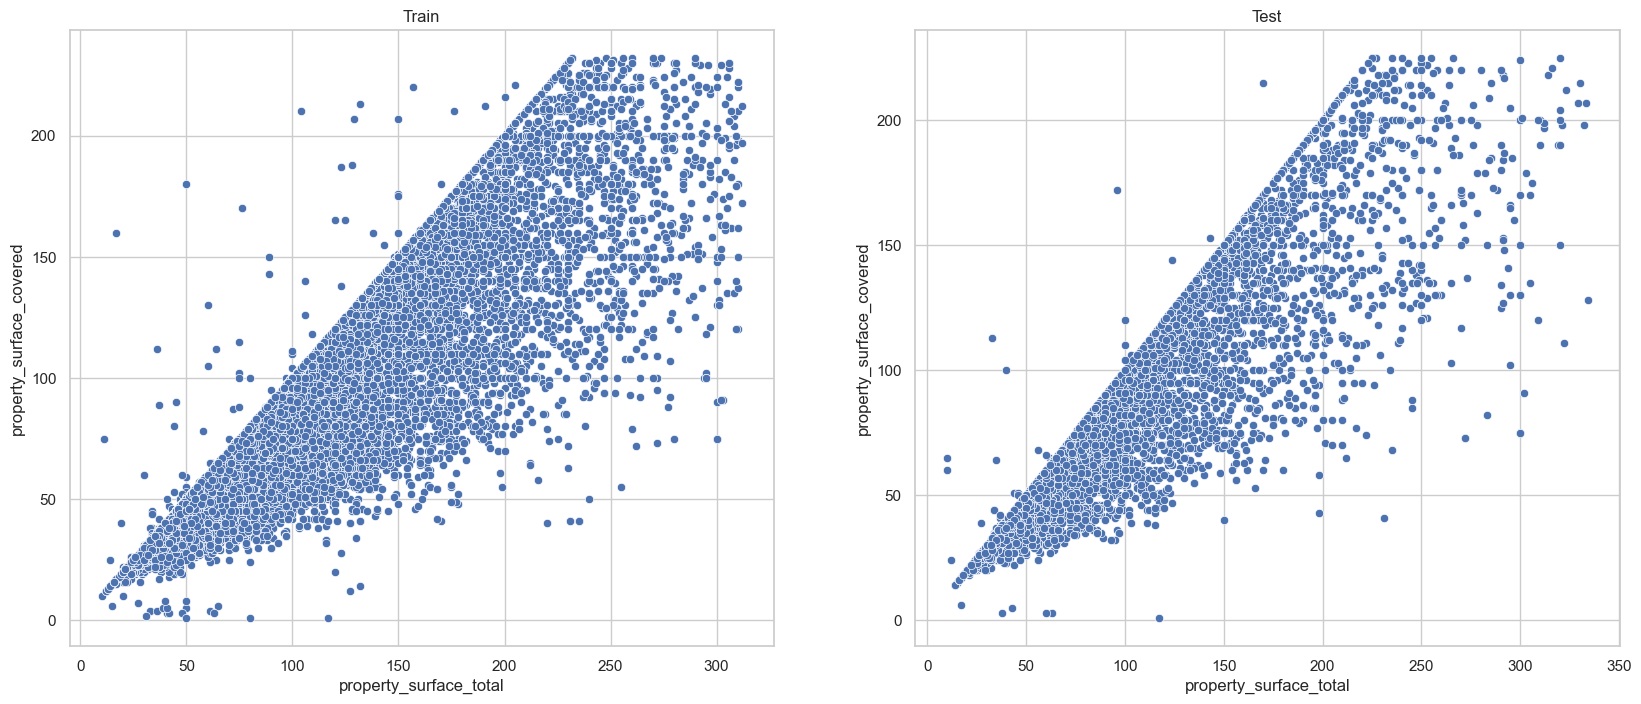

In [237]:
#scatter property_surface_total vs property_surface_covered for train and test
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(data=ds_propiedades_train, x='property_surface_total', y='property_surface_covered', ax=axs[0])
sns.scatterplot(data=ds_propiedades_test, x='property_surface_total', y='property_surface_covered', ax=axs[1])

#titles
axs[0].set_title('Train')
axs[1].set_title('Test')


plt.show()

Decidimos eliminarlos

In [238]:

total_cubierta_erronea_train = (ds_propiedades_train[ds_propiedades_train['property_surface_total'] < ds_propiedades_train['property_surface_covered']])
total_cubierta_erronea_test = (ds_propiedades_test[ds_propiedades_test['property_surface_total'] < ds_propiedades_test['property_surface_covered']])
print(total_cubierta_erronea_train.shape)
print(total_cubierta_erronea_test.shape)



(99, 9)
(33, 9)


In [239]:

ds_propiedades_train.drop(total_cubierta_erronea_train.index, inplace=True)
ds_propiedades_test.drop(total_cubierta_erronea_test.index, inplace=True)


vuelvo a graficar

Text(0.5, 1.0, 'Test')

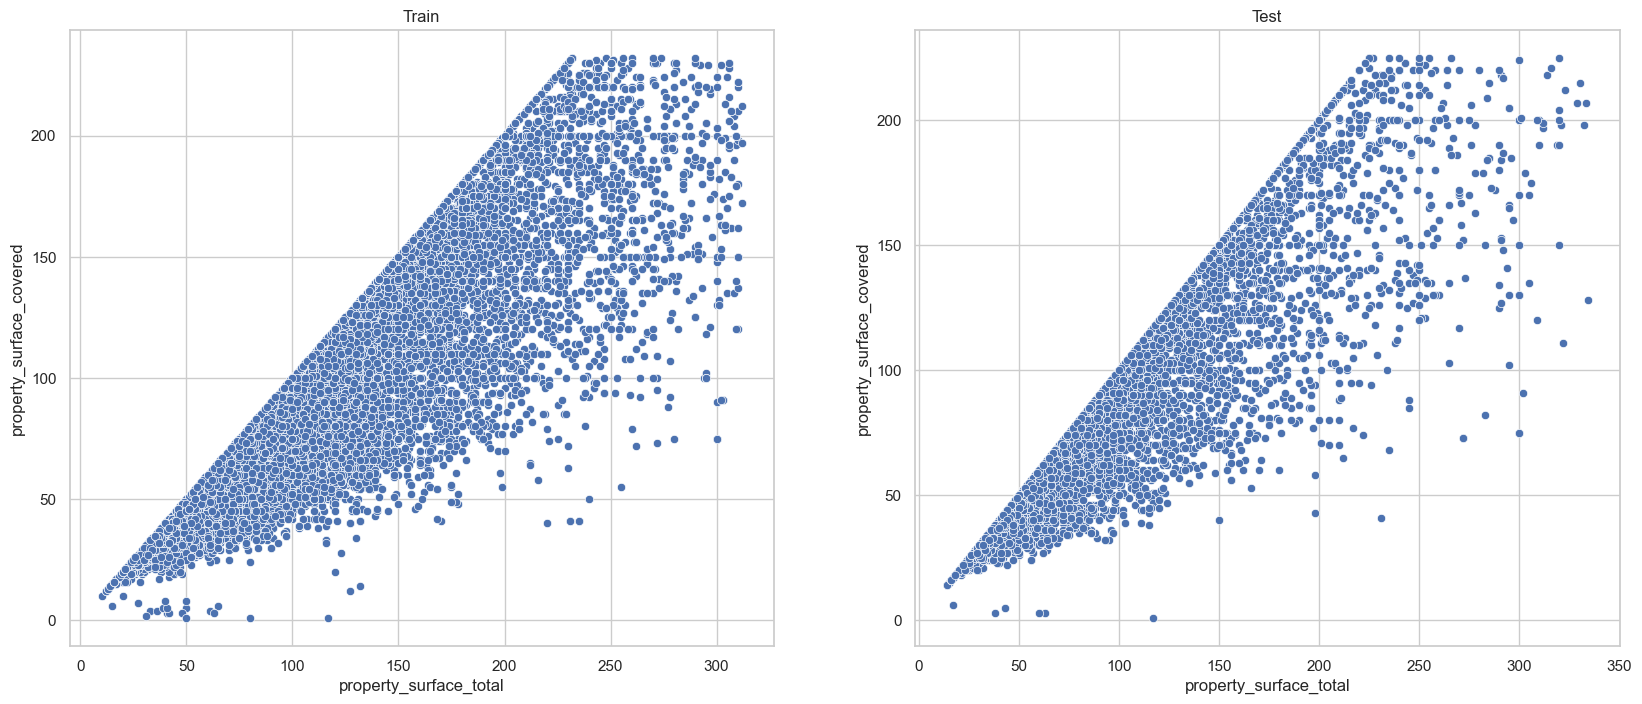

In [240]:

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(data=ds_propiedades_train, x='property_surface_total', y='property_surface_covered', ax=axs[0])
sns.scatterplot(data=ds_propiedades_test, x='property_surface_total', y='property_surface_covered', ax=axs[1])

#titles
axs[0].set_title('Train')
axs[1].set_title('Test')

Comparamos las relacion entre ambientes y superficies.

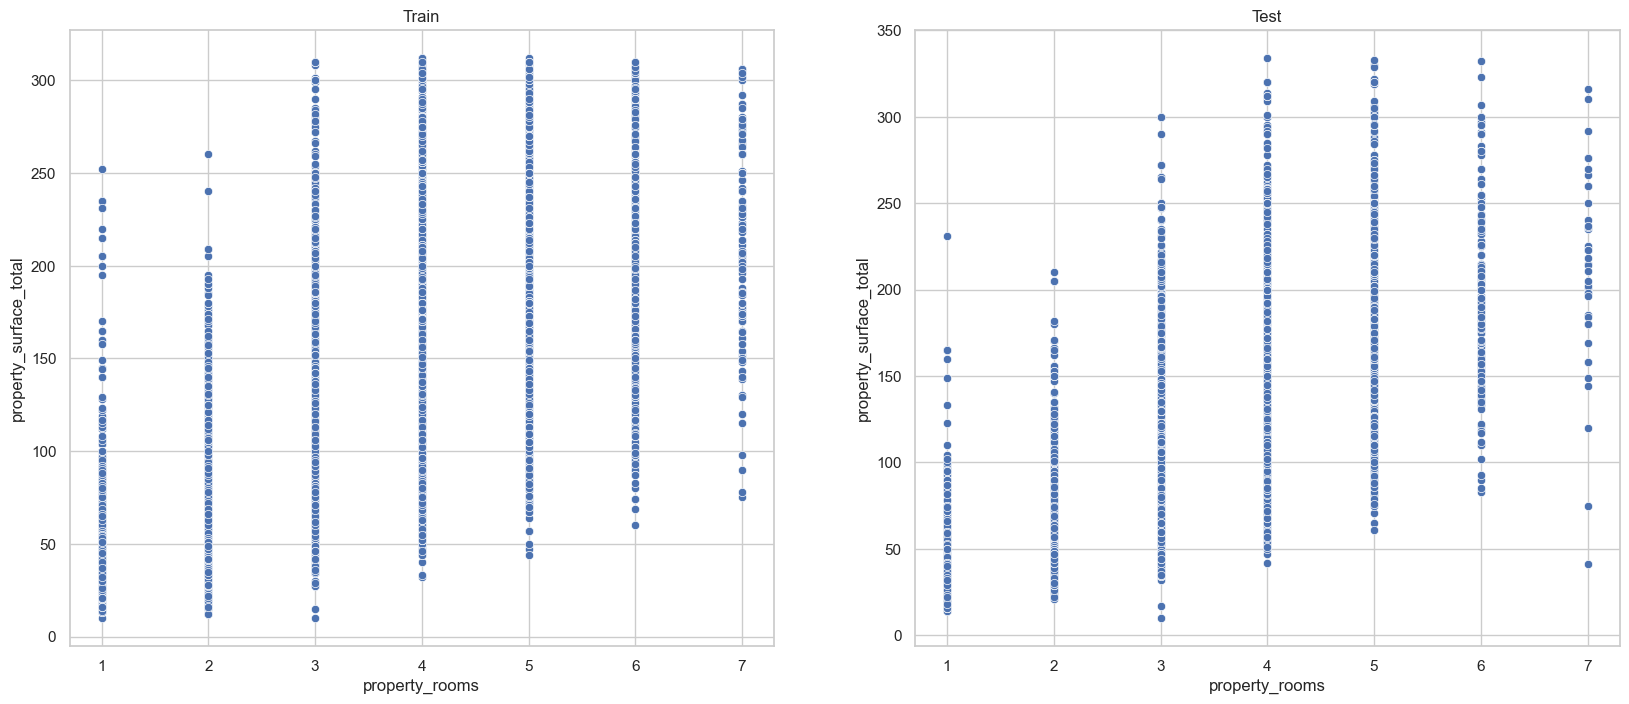

In [243]:
#scatter property_surrface_total vs property_rooms for train and test
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(data=ds_propiedades_train, x='property_rooms', y='property_surface_total', ax=axs[0])
sns.scatterplot(data=ds_propiedades_test, x='property_rooms', y='property_surface_total', ax=axs[1])

#titles
axs[0].set_title('Train')
axs[1].set_title('Test')


plt.show()

Vemos que los graficos son bastante uniformes?????????? TO DO

Ahora vamos a detectar a los Outliers de forma multivariada

In [208]:
# checkpoint de los datos sin outliers
ds_propiedades_train_sin_outliers = ds_propiedades_train.copy()
ds_propiedades_test_sin_outliers = ds_propiedades_test.copy()

<b> <strong> <h2>Datos Faltantes </h2>

Una de las cosas mas importantes a la hora de trabajar con datos es saber si hay datos faltantes. Esto es importante ya que si hay datos faltantes, cualquier modelo que sea entrenado con nuestros datos puede verse afectado por estos.

In [209]:
#levantamos el dataset de test y train ya analizados

ds_propiedades_test = ds_propiedades_test_sin_outliers.copy()
ds_propiedades_train = ds_propiedades_train_sin_outliers.copy()

Para comenzar veremos si hay datos faltantes en el dataset de test y train.
Buscamos los porcentajes de datos faltantes en cada columna de los datasets.

In [210]:
filas_totales=ds_propiedades_train.shape[0]
df_nulos_train = (ds_propiedades_train.isna().sum()/filas_totales*100).to_frame(name="faltantes").reset_index()
df_nulos_train.rename(columns={'index':'columna'}, inplace=True)
df_nulos_train

,columna,faltantes
0,latitud,3.825786
1,longitud,3.825786
2,place_l3,0.226361
3,place_l4,96.262244
4,place_l5,100.000000
5,place_l6,100.000000
6,property_type,0.000000
7,property_rooms,0.852348
8,property_bedrooms,12.222114
9,property_surface_total,5.031649


In [211]:
filas_totales=ds_propiedades_test.shape[0]
df_nulos_test = (ds_propiedades_test.isna().sum()/filas_totales*100).to_frame(name="faltantes").reset_index()
df_nulos_test.rename(columns={'index':'columna'}, inplace=True)
df_nulos_test

,columna,faltantes
0,latitud,3.856919
1,longitud,3.856919
2,place_l3,0.207120
3,place_l4,96.417376
4,place_l5,100.000000
5,place_l6,100.000000
6,property_type,0.000000
7,property_rooms,0.654948
8,property_bedrooms,11.553963
9,property_surface_total,4.970891


Graficamos para ambos datasets la cantidad de datos faltantes por columna.

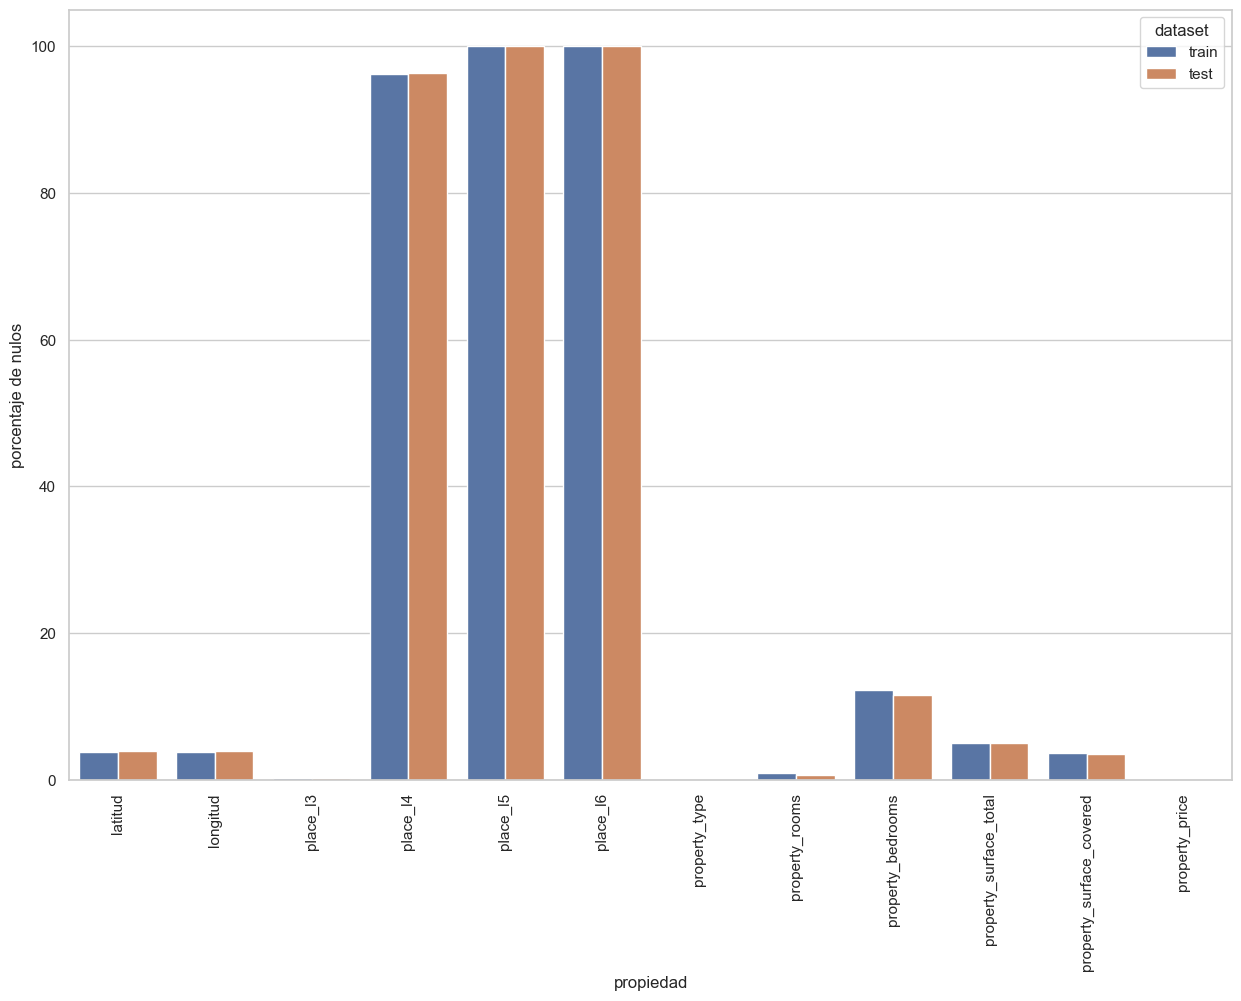

In [212]:
from matplotlib.pyplot import xlabel

plt.figure(figsize=(15, 10))

df_nulos_train['dataset'] = 'train'
df_nulos_test['dataset'] = 'test'

df_nulos = pd.concat([df_nulos_train, df_nulos_test])

sns.barplot(x='columna', y='faltantes', hue='dataset', data=df_nulos).set(xlabel='propiedad', ylabel='porcentaje de nulos')
plt.xticks(rotation=90)

plt.show()

Calculamos la cantidad de datos faltantes por cada fila de los datasets.

In [213]:
df_nulos_filas_train = ds_propiedades_train.isnull().sum(axis=1)
df_nulos_filas_train = df_nulos_filas_train.value_counts(normalize=True).to_frame(name="porcentaje de filas").reset_index()
df_nulos_filas_train.rename(columns={'index':"valores nulos por fila"}, inplace=True)
df_nulos_filas_train

,valores nulos por fila,porcentaje de filas
0,3,0.755865
1,4,0.168499
2,5,0.042198
3,2,0.024481
4,6,0.006875
5,8,0.001118
6,7,0.000950
7,9,0.000014


In [214]:
df_nulos_filas_test = ds_propiedades_test.isnull().sum(axis=1)
df_nulos_filas_test = df_nulos_filas_test.value_counts(normalize=True).to_frame(name="porcentaje de filas").reset_index()
df_nulos_filas_test.rename(columns={'index':"valores nulos por fila"}, inplace=True)
df_nulos_filas_test

,valores nulos por fila,porcentaje de filas
0,3,0.761923
1,4,0.166648
2,5,0.040025
3,2,0.023287
4,6,0.005990
5,7,0.001232
6,8,0.000896


Graficamos:

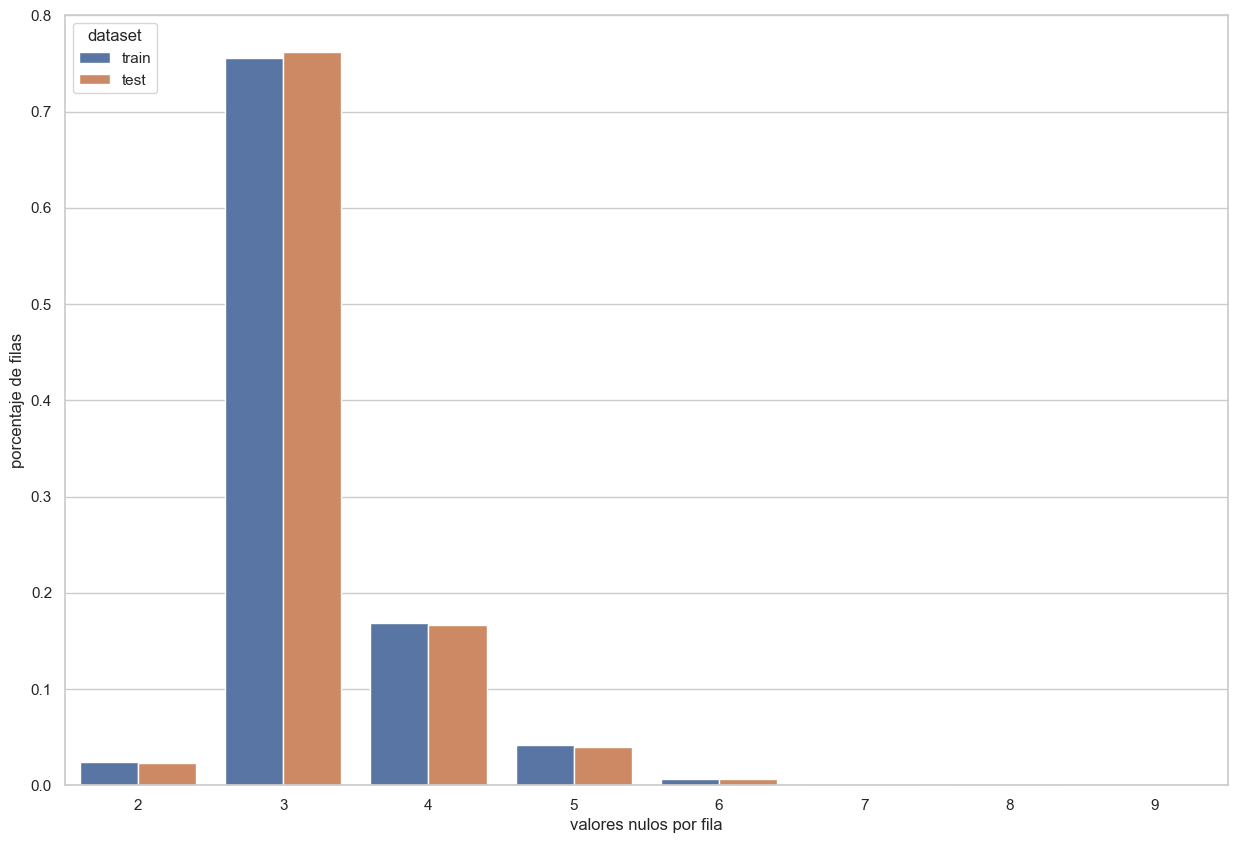

In [215]:
plt.figure(figsize=(15, 10))

df_nulos_filas_train['dataset'] = 'train'
df_nulos_filas_test['dataset'] = 'test'

df_nulos_filas = pd.concat([df_nulos_filas_train, df_nulos_filas_test])

sns.barplot(x='valores nulos por fila', y='porcentaje de filas', hue='dataset', data=df_nulos_filas)

plt.show()

<h3>Analisis de completado de datos faltantes</h3>

Para esta sección, tenemos que regirnos unicamente por el dataset de train y luego replicar las acciones en el dataset de test, pero no podemos/tenemos que tomar decisiones basandonos en el dataset de test porque eso puede interferir luego con el resultado de las pruebas.
<br><br>
<h4>Eliminación de datos</h4>

Acá podemos ver que las variables "place_l6", "place_l5" y "place_l4" tienen una grandísima cantidad de valores nulos. Por esto decidimos eliminarlas.


In [216]:
columnas_eliminar_NANs=["place_l6", "place_l5", "place_l4"]
ds_propiedades_train.drop(columnas_eliminar_NANs, axis='columns', inplace=True)
ds_propiedades_test.drop(columnas_eliminar_NANs, axis='columns', inplace=True)

In [217]:
#checkpoint de los datasets sin las columnas eliminadas
ds_propiedades_test_sin_NANs = ds_propiedades_test.copy()
ds_propiedades_train_sin_NANs = ds_propiedades_train.copy()

<h4>Duplicados</h4>

Revisamos si hay datos duplicados en el dataset de train y test.

In [218]:
ds_propiedades_test = ds_propiedades_test_sin_NANs.copy()
ds_propiedades_train = ds_propiedades_train_sin_NANs.copy()

In [219]:
duplicados_train = ds_propiedades_train[ds_propiedades_train.duplicated()]
duplicados_test = ds_propiedades_test[ds_propiedades_test.duplicated()]

print(f"Cantidad de duplicadas en train: {duplicados_train.shape[0]}")
print(f"Cantidad de duplicadas en test: {duplicados_test.shape[0]}")


Cantidad de duplicadas en train: 8495
Cantidad de duplicadas en test: 810


Vemos que tenemos muchos datos duplicados en el dataset de train. Esto puede deberse a que los departamentos o PHs de un edificio/propiedad pueden estar en la misma ubicacion (latitud, longitud), ser de las mismas dimensiones y tener el mismo precio. En el caso de las casas, si podemos asumir que si todos los datos estan duplicados significa que son duplicados. Por esto es que procedemos a rehacer el analisis separando entre casas y departamentos/PHs.

Tampoco se puede utilizar el titulo para diferenciarlos porque es totalmente posible que existan publicaciones de departamentos/PHs de un mismo edificio/propiedad con el mismo titulo siendo todos publicados por la constructora (cuando son de pozo o a estrenar) o dueño de multiples unidades.

In [220]:
duplicados_train_casas = duplicados_train[duplicados_train.property_type == 'Casa']
duplicados_train_no_casas = duplicados_train[duplicados_train.property_type != 'Casa']

print(f"Cantidad de duplicadas en train (CASA): {duplicados_train_casas.shape[0]}")
print(f"Cantidad de duplicadas en train (DEPTO/PH): {duplicados_train_no_casas.shape[0]}")


Cantidad de duplicadas en train (CASA): 157
Cantidad de duplicadas en train (DEPTO/PH): 8338


Vemos que existen PHs y casas duplicados, por lo que procedemos a eliminarlos de ambos datasets. 

In [221]:
ds_propiedades_train.drop(duplicados_train_casas.index, inplace=True)

#lo mismo para test
duplicados_test_casas = duplicados_test[duplicados_test.property_type == 'Casa']
ds_propiedades_test.drop(duplicados_test_casas.index, inplace=True)


In [222]:
# checkpoint de los datasets sin duplicados
ds_propiedades_test_sin_duplicados = ds_propiedades_test.copy()
ds_propiedades_train_sin_duplicados = ds_propiedades_train.copy()

<h4>Completado de bedrooms y rooms con regresion lineal multiple</b4>

In [223]:
ds_propiedades_test = ds_propiedades_test_sin_duplicados.copy()
ds_propiedades_train = ds_propiedades_train_sin_duplicados.copy()

Para bedrooms vimos que existe una gran correlacion con las rooms y el precio, no solo por informacion del dataframe, sino tambien por el dominio del problema donde sabemos que en rooms estan incluidas las bedrooms y que la capacidad de personas es uno de los factores mas determinantes incluso por encima de la superficie (tambien se respalda con las correlaciones vistas anteriormente). Por esto decidimos hacer una regresion lineal entre estos tres para completar los datos faltantes.

In [224]:
from matplotlib.pyplot import plot
from sklearn.linear_model import LinearRegression

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Hacemos una regresion lineal para predecir los valores nulos de property_bedrooms y property_rooms
beedrooms_rooms_price_train = ds_propiedades_train[['property_bedrooms', 'property_rooms', 'property_price']].copy()
beedrooms_rooms_price_test = ds_propiedades_test[['property_bedrooms', 'property_rooms', 'property_price']].copy()

lr = LinearRegression()
imp = IterativeImputer(estimator=lr, missing_values=np.nan, max_iter=20, verbose=0, random_state=0)

imp = imp.fit(beedrooms_rooms_price_train)

Una vez tenemos el modelo entrenado con los datos de train, aplicamos el modelo para completar en ambos datasets con el mismo modelado para no alterar los resultados.

Tambien transformamos los valores obtenidos de la regresion linear en rooms y beedrooms a enteros por ser valores discretos.

In [225]:
beedrooms_rooms_price_train_completo = beedrooms_rooms_price_train.copy()
beedrooms_rooms_price_train_completo[['property_bedrooms', 'property_rooms', 'property_price']] = imp.transform(beedrooms_rooms_price_train)
beedrooms_rooms_price_train_completo['property_rooms'] = beedrooms_rooms_price_train_completo['property_rooms'].round(0)
beedrooms_rooms_price_train_completo['property_bedrooms'] = beedrooms_rooms_price_train_completo['property_bedrooms'].round(0)

beedrooms_rooms_price_test_completo = beedrooms_rooms_price_test.copy()
beedrooms_rooms_price_test_completo[['property_bedrooms', 'property_rooms', 'property_price']] = imp.transform(beedrooms_rooms_price_test)
beedrooms_rooms_price_test_completo['property_rooms'] = beedrooms_rooms_price_test_completo['property_rooms'].round(0)
beedrooms_rooms_price_test_completo['property_bedrooms'] = beedrooms_rooms_price_test_completo['property_bedrooms'].round(0)


Para demostrar que al eliminar las filas con valores nulos, no se pierde ni altera información graficamos  un scatterplot de la distribucionentre rooms y bedrooms previa y posterior a la eliminación de los valores nulos, se ve sque los que eran nulos antes, ahora se predicen.

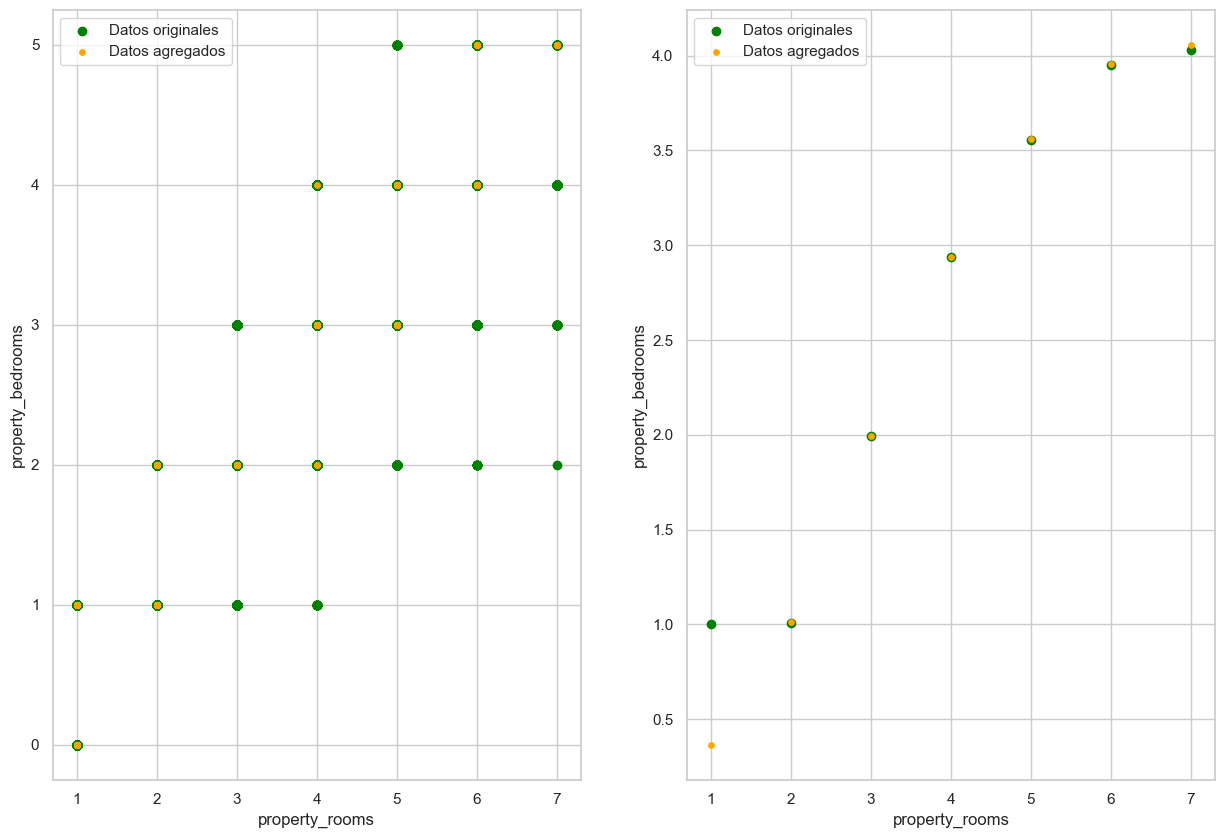

In [226]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].scatter(x=beedrooms_rooms_price_train_completo['property_rooms'], y=beedrooms_rooms_price_train_completo['property_bedrooms'], color='green')

#PONER LEYENDASSSSSSSS

filas_datos_faltantes = beedrooms_rooms_price_train[beedrooms_rooms_price_train.isnull().any(axis=1)]
datos_agregados = filas_datos_faltantes.merge(beedrooms_rooms_price_train_completo, how='inner', left_index=True, right_index=True)[['property_bedrooms_y', 'property_rooms_y']]

axs[0].scatter(x=datos_agregados['property_rooms_y'], y=datos_agregados['property_bedrooms_y'], color='orange', s=15)

relacion_bedrooms_rooms = beedrooms_rooms_price_train[['property_bedrooms', 'property_rooms']].copy()
relacion_bedrooms_rooms = relacion_bedrooms_rooms.groupby('property_rooms').mean().reset_index()
axs[1].scatter(x=relacion_bedrooms_rooms['property_rooms'], y=relacion_bedrooms_rooms['property_bedrooms'], color='green')

relacion_bedrooms_rooms_completo = beedrooms_rooms_price_train_completo[['property_bedrooms', 'property_rooms']].copy()
relacion_bedrooms_rooms_completo = relacion_bedrooms_rooms_completo.groupby('property_rooms').mean().reset_index()
axs[1].scatter(x=relacion_bedrooms_rooms_completo['property_rooms'], y=relacion_bedrooms_rooms_completo['property_bedrooms'], color='orange', s=15)
plt.setp(axs[0], xlabel='property_rooms', ylabel='property_bedrooms')
plt.setp(axs[1], xlabel='property_rooms', ylabel='property_bedrooms')


axs[0].legend(['Datos originales', 'Datos agregados'])
axs[1].legend(['Datos originales', 'Datos agregados'])


plt.show()

Habiendo visto que los valores completados son coerentes con los datos, procedemos a completar los datos faltantes de rooms con el mismo modelo.



In [227]:
a = (ds_propiedades_train['property_bedrooms'] / ds_propiedades_train['property_rooms']).mean()
print(f'dormitorios por cuarto antes: {a}')

ds_propiedades_train[['property_bedrooms', 'property_rooms']] = beedrooms_rooms_price_train_completo[['property_bedrooms', 'property_rooms']]
ds_propiedades_test[['property_bedrooms', 'property_rooms']] = beedrooms_rooms_price_test_completo[['property_bedrooms', 'property_rooms']]

a = (ds_propiedades_train['property_bedrooms'] / ds_propiedades_train['property_rooms']).mean()
print(f'dormitorios por cuarto despues: {a}')

dormitorios por cuarto antes: 0.650642185376876
dormitorios por cuarto despues: 0.581023166023166


In [228]:
# checkpoint de los datasets con los valores nulos de property_bedrooms y property_rooms completados
ds_propiedades_train_bedrooms_rooms_completos = ds_propiedades_train.copy()
ds_propiedades_test_bedrooms_rooms_completos = ds_propiedades_test.copy()

<h4>Completar Latitud y Logitud</h4>


In [229]:
ds_propiedades_train = ds_propiedades_train_bedrooms_rooms_completos.copy()
ds_propiedades_test = ds_propiedades_test_bedrooms_rooms_completos.copy()

In [230]:
filas_latitud_NaN = ds_propiedades[ds_propiedades['latitud'].isnull()].shape[0]
filas_longitud_NaN = ds_propiedades[ds_propiedades['longitud'].isnull()].shape[0]
filas_latitud_longitud_Nan = ds_propiedades[ds_propiedades['latitud'].isnull() & ds_propiedades['longitud'].isnull()].shape[0] #Estos los droppeamos, y para predecir longitud y latitud usamos las filas que si tengan place_l3
filas_latitud_longitud_barrio_Nan = ds_propiedades[ds_propiedades['latitud'].isnull() & ds_propiedades['longitud'].isnull() & ds_propiedades['place_l3'].isnull()].shape[0] #Estos los droppeamos, y para predecir longitud y latitud usamos las filas que si tengan place_l3

print(f"Cantidad de filas con latitud NaN: {filas_latitud_NaN}")
print(f'Cantidad de filas con longitud NaN: {filas_longitud_NaN},')
print(f'Cantidad de filas con Latitud y Longitud NaN: {filas_latitud_longitud_Nan}.')
print(f'Entonces las filas que que tienen Latitud como Nan y no a longitud son: {filas_latitud_NaN-filas_latitud_longitud_Nan}')
print(f'Cantidad de filas con Latitud, Longitud y barrio NaN: {filas_latitud_longitud_barrio_Nan}.')

Cantidad de filas con latitud NaN: 3730
Cantidad de filas con longitud NaN: 3730,
Cantidad de filas con Latitud y Longitud NaN: 3730.
Entonces las filas que que tienen Latitud como Nan y no a longitud son: 0
Cantidad de filas con Latitud, Longitud y barrio NaN: 170.


Para predecir la Latitud y Longitud de las viviendas faltantes, al ver que todas las filas en las que falta la Latitud, también falta la Longitud. Podemos usar el barrio (place_l3) de esta para tener una certeza de donde se puede encontrar. Así que calculamos la mediana de Latitud y Longitud para cada barrio (place_l3) y ponemos estas en su lugar. 

Primero droppeamos las filas que tienen como valores faltantes al barrio (place_l3) y a la latitud y longitud ya que la falta de ubicacion es un dato muy importante para el tipo de vivienda y sin estos tres datos es imposible determinarla con certeza.

In [231]:
ds_propiedades_train.drop(ds_propiedades_train[ds_propiedades_train['place_l3'].isnull() & 
                    ds_propiedades_train['latitud'].isnull() & ds_propiedades_train['longitud'].isnull()].index,
                    inplace=True)

ds_propiedades_test.drop(ds_propiedades_test[ds_propiedades_test['place_l3'].isnull() & 
                    ds_propiedades_test['latitud'].isnull() & ds_propiedades_test['longitud'].isnull()].index,
                    inplace=True)

Completamos los valores faltantes de longitud y latitud con las medianas del barrio (entrenado unicamente con train y usado para ambos datasets) en el que se ubiquen 

In [232]:
median_coord_place_l3 = ds_propiedades_train.groupby('place_l3')[['latitud', 'longitud']].median()


ds_propiedades_train['latitud'] = ds_propiedades_train.apply(lambda x: median_coord_place_l3.loc[x['place_l3']]['latitud'] if np.isnan(x['latitud']) else x['latitud'], axis=1)
ds_propiedades_train['longitud'] = ds_propiedades_train.apply(lambda x: median_coord_place_l3.loc[x['place_l3']]['longitud'] if np.isnan(x['longitud']) else x['longitud'], axis=1)

ds_propiedades_test['latitud'] = ds_propiedades_test.apply(lambda x: median_coord_place_l3.loc[x['place_l3']]['latitud'] if np.isnan(x['latitud']) else x['latitud'], axis=1)
ds_propiedades_test['longitud'] = ds_propiedades_test.apply(lambda x: median_coord_place_l3.loc[x['place_l3']]['longitud'] if np.isnan(x['longitud']) else x['longitud'], axis=1)

median_coord_place_l3.reset_index(inplace=True)

ds_propiedades_train[ds_propiedades_train['latitud'].isnull()]

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price


Ahora completamos los valores restantes del barrio (place_l3) a partir de la latitud y longitud buscando el barrio con el centro mas cercano a la latitud y longitud de la vivienda.

In [233]:
def get_barrio(lat, lon):
    median_coord_place_l3['distancia'] = median_coord_place_l3.apply(lambda x: np.sqrt((x['latitud'] - lat)**2 + (x['longitud'] - lon)**2), axis=1)
    return median_coord_place_l3.sort_values(by=['distancia']).at[0, 'place_l3']

for i in ds_propiedades_train.index:
    if pd.isnull(ds_propiedades_train.at[i, 'place_l3']):
        lat = ds_propiedades_train.at[i, 'latitud']
        lon = ds_propiedades_train.at[i, 'longitud']
        barrio = get_barrio(lat, lon)
        ds_propiedades_train.at[i, 'place_l3'] = barrio


for i in ds_propiedades_test.index:
    if pd.isnull(ds_propiedades_test.at[i, 'place_l3']):
        lat = ds_propiedades_test.at[i, 'latitud']
        lon = ds_propiedades_test.at[i, 'longitud']
        barrio = get_barrio(lat, lon)
        ds_propiedades_test.at[i, 'place_l3'] = barrio

ds_propiedades_train[ds_propiedades_train['place_l3'].isnull()]

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price


In [234]:
# checkpoint de los datasets con los valores nulos de latitud, longitud y place_l3 completados
ds_propiedades_train_latitud_longitud_place_l3_completos = ds_propiedades_train.copy()
ds_propiedades_test_latitud_longitud_place_l3_completos = ds_propiedades_test.copy()

<h4>Completar la superficie total y cubierta</h4>

Para calcular la superficie total usamos la regresion lineal multiple entre los rooms y el price siendo que estos son los que mantienen mayor correlación. Una vez tenemos el modelo entrenado con los datos de train, aplicamos el modelo para completar en ambos datasets con el mismo modelado para no alterar los resultados.

In [235]:
ds_propiedades_train = ds_propiedades_train_latitud_longitud_place_l3_completos.copy()
ds_propiedades_test = ds_propiedades_test_latitud_longitud_place_l3_completos.copy()

In [236]:
# #Hacemos una regresion lineal para predecir los valores nulos de property_surface_total
surface_y_rooms_por_depto = ds_propiedades[['property_surface_total', 'property_rooms', 'property_price']]
surface_y_rooms_por_depto_completo = imp.fit_transform(surface_y_rooms_por_depto)



'''x_train, x_test, y_train, y_test = train_test_split(dataset[features].values, 
                                                    dataset[target].values, 
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=dataset[target].values) #estratificado para mantener proporcion'''


'x_train, x_test, y_train, y_test = train_test_split(dataset[features].values, \n                                                    dataset[target].values, \n                                                    test_size=0.2,    #20% al conjunto de test\n                                                    random_state=13,  #para poder reproducir el experimento\n                                                    stratify=dataset[target].values) #estratificado para mantener proporcion'